# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('geo_comment.xlsx')
data_geo = pd.read_excel('geo.xlsx')

In [3]:
data_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108806 entries, 0 to 108805
Data columns (total 4 columns):
Unnamed: 0       108806 non-null int64
x                108806 non-null float64
y                108806 non-null float64
comment_class    108806 non-null int64
dtypes: float64(2), int64(2)
memory usage: 3.3 MB


In [4]:
data.head()

Unnamed: 0          x          y  comment_class  multiplier  \
0           0  37.612416  55.777454             -1           1   
1           1  37.612416  55.777454             -1           1   
2           2  37.603298  55.742108             -1           1   
3           3  37.558526  55.728758             -1           1   
4           4  37.566431  55.731794             -1           1   

                                             comment  
0  Во все разделы правил землепользования и застр...  
1  На основании вступившего в законную силу судеб...  
2  Внести в Проект правил землепользования и заст...  
3  Учитывая социальную значимость проекта строите...  
4  Учитывая социальную значимость проекта строите...

In [5]:
data.shape

(70382, 6)

In [6]:
data.columns

Index(['Unnamed: 0', 'x', 'y', 'comment_class', 'multiplier', 'comment'], dtype='object')

In [7]:
len(data['Unnamed: 0'].unique())

70382

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (36, 27)

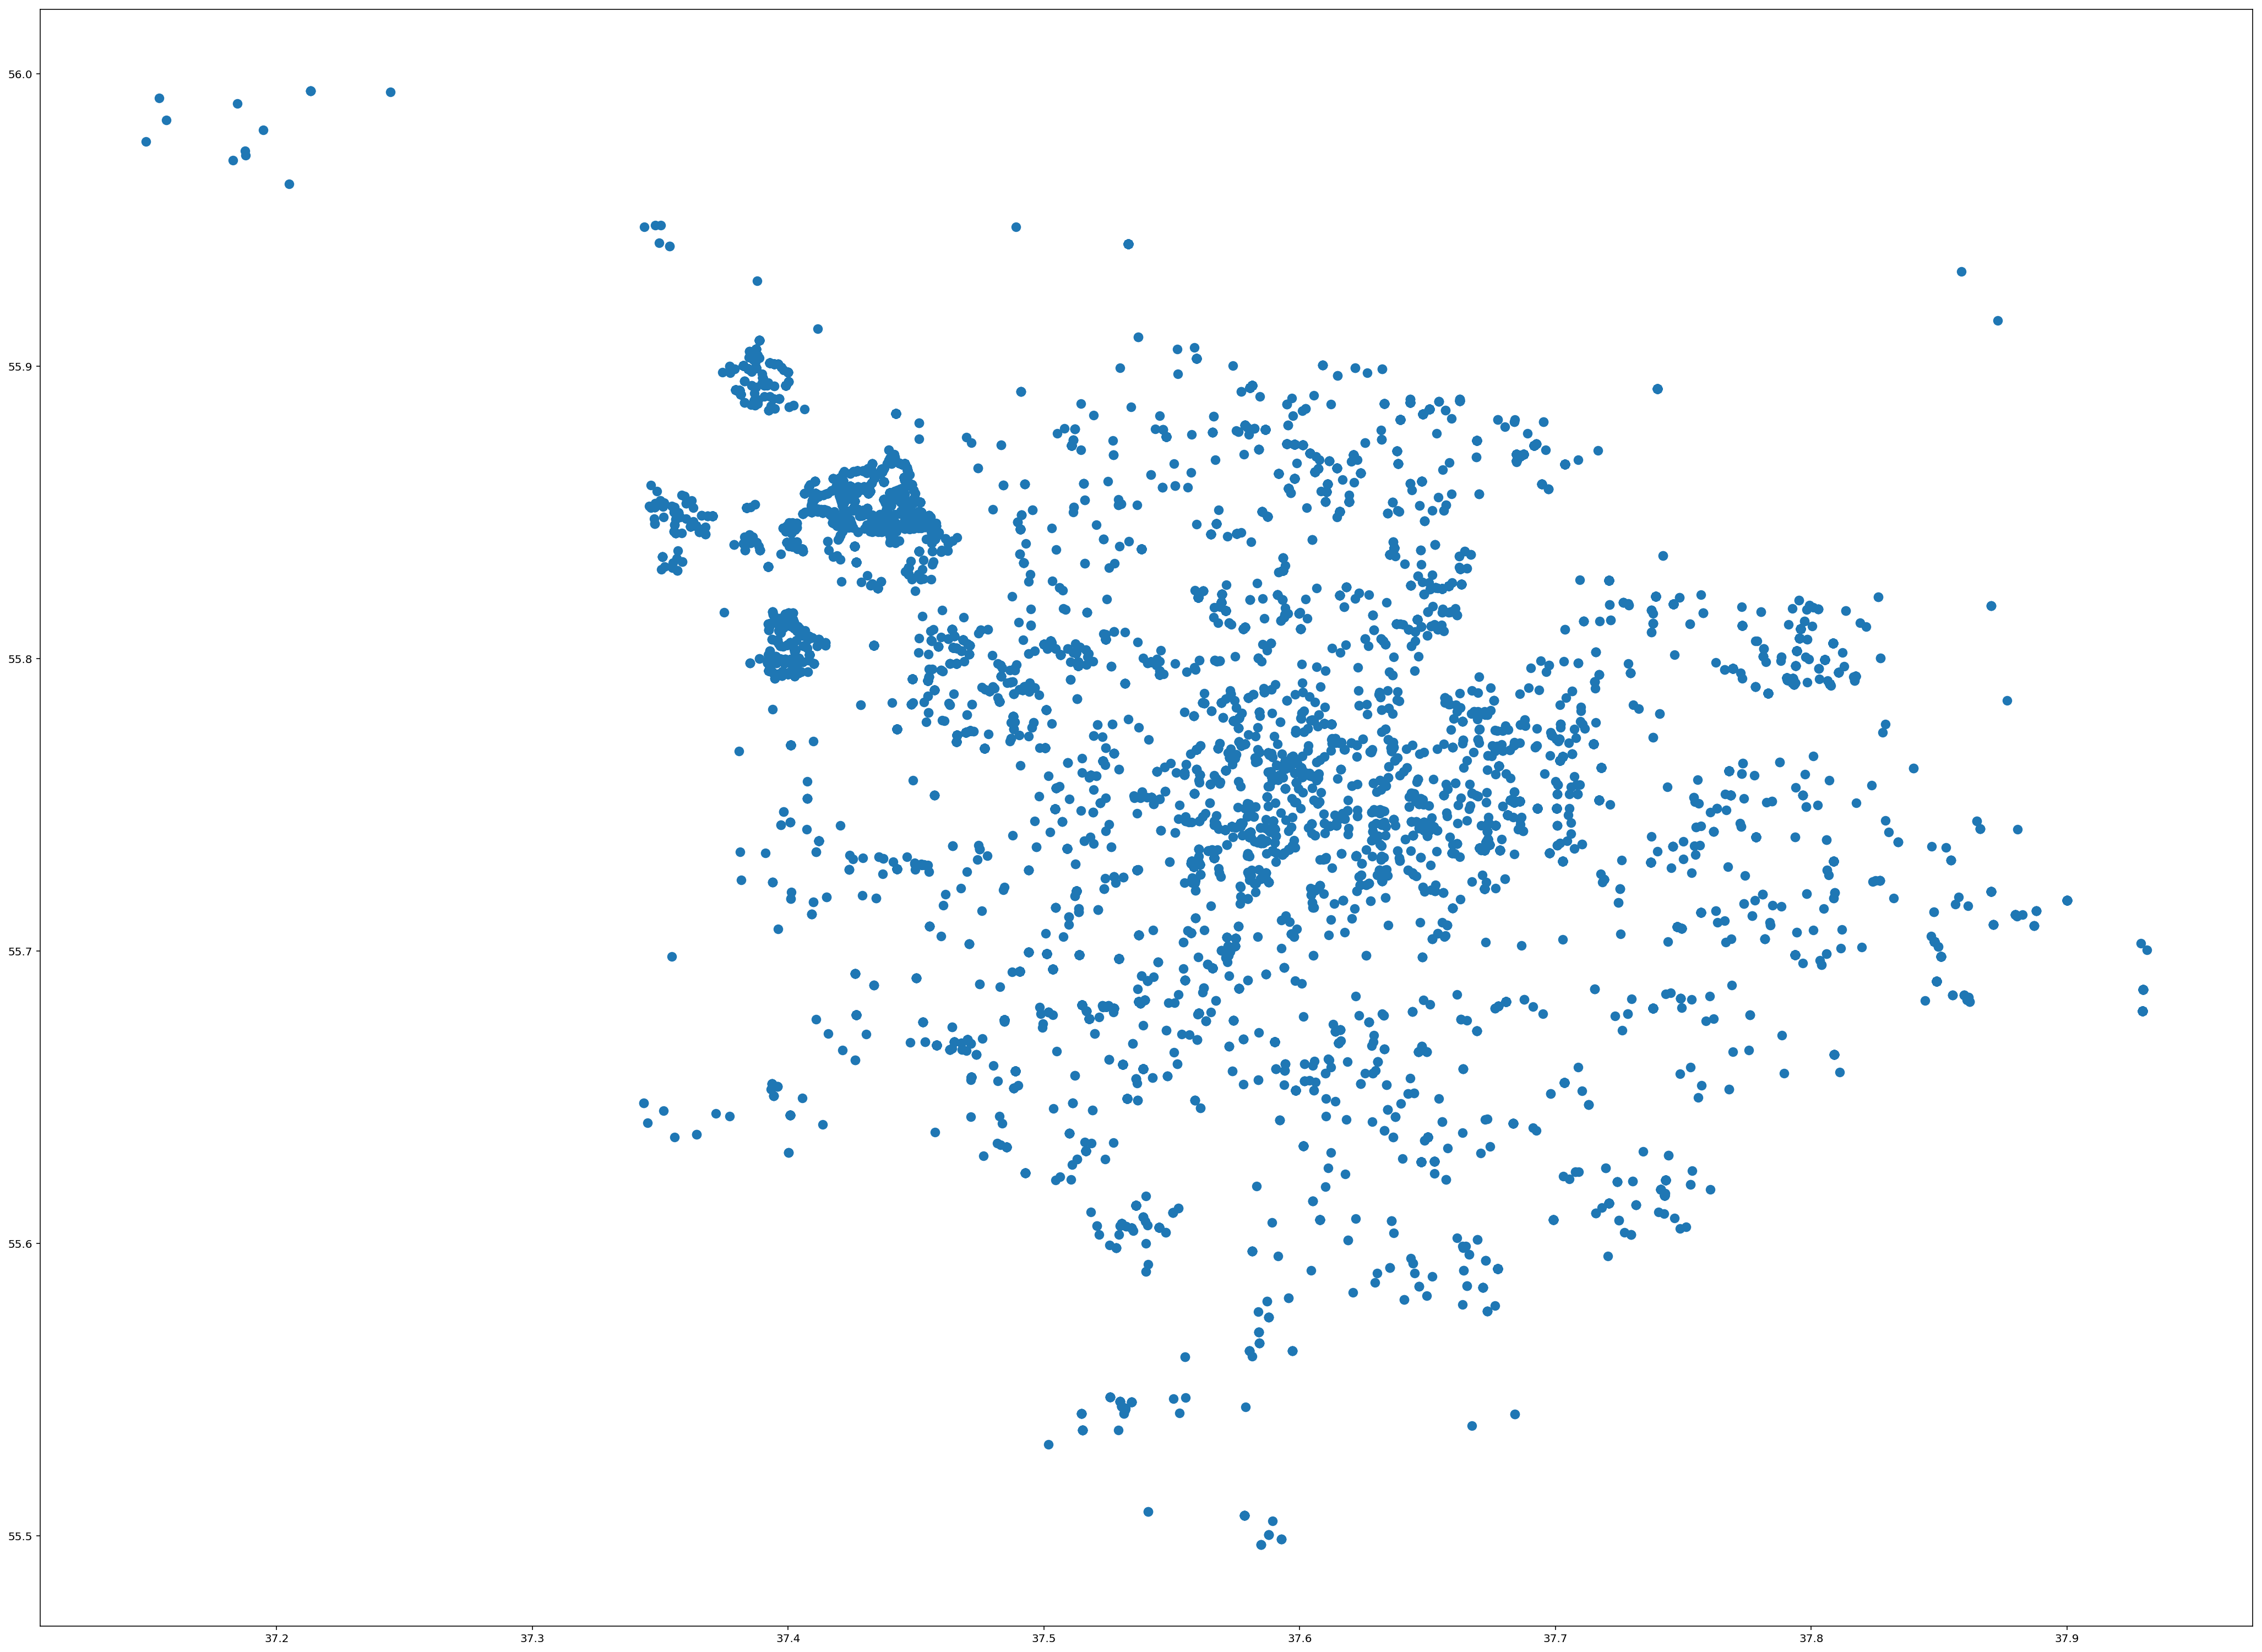

In [11]:
plt.scatter(data.x, data.y, cmap='autumn', s=60)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
data.head()

Unnamed: 0          x          y  comment_class  multiplier  \
0           0  37.612416  55.777454             -1           1   
1           1  37.612416  55.777454             -1           1   
2           2  37.603298  55.742108             -1           1   
3           3  37.558526  55.728758             -1           1   
4           4  37.566431  55.731794             -1           1   

                                             comment  
0  Во все разделы правил землепользования и застр...  
1  На основании вступившего в законную силу судеб...  
2  Внести в Проект правил землепользования и заст...  
3  Учитывая социальную значимость проекта строите...  
4  Учитывая социальную значимость проекта строите...

In [15]:
data_for_scaler = data.copy()
data_for_scaler.head()

Unnamed: 0          x          y  comment_class  multiplier  \
0           0  37.612416  55.777454             -1           1   
1           1  37.612416  55.777454             -1           1   
2           2  37.603298  55.742108             -1           1   
3           3  37.558526  55.728758             -1           1   
4           4  37.566431  55.731794             -1           1   

                                             comment  
0  Во все разделы правил землепользования и застр...  
1  На основании вступившего в законную силу судеб...  
2  Внести в Проект правил землепользования и заст...  
3  Учитывая социальную значимость проекта строите...  
4  Учитывая социальную значимость проекта строите...

In [16]:
data_for_scaler.drop('Unnamed: 0', axis = 1, inplace = True)
data_for_scaler.drop('comment_class', axis = 1, inplace = True)
data_for_scaler.drop('multiplier', axis = 1, inplace = True)
data_for_scaler.drop('comment', axis = 1, inplace = True)

In [17]:
data_for_scaler.head()

x          y
0  37.612416  55.777454
1  37.612416  55.777454
2  37.603298  55.742108
3  37.558526  55.728758
4  37.566431  55.731794

In [18]:
Scaled_data = scaler.fit_transform(data_for_scaler)

In [19]:
Scaled_data

array([[ 0.17363392, -0.12923628],
       [ 0.17363392, -0.12923628],
       [ 0.10766492, -0.66296372],
       ...,
       [-1.21078898,  0.94742964],
       [-1.01223806,  0.10649107],
       [-0.99241408,  0.76417507]])

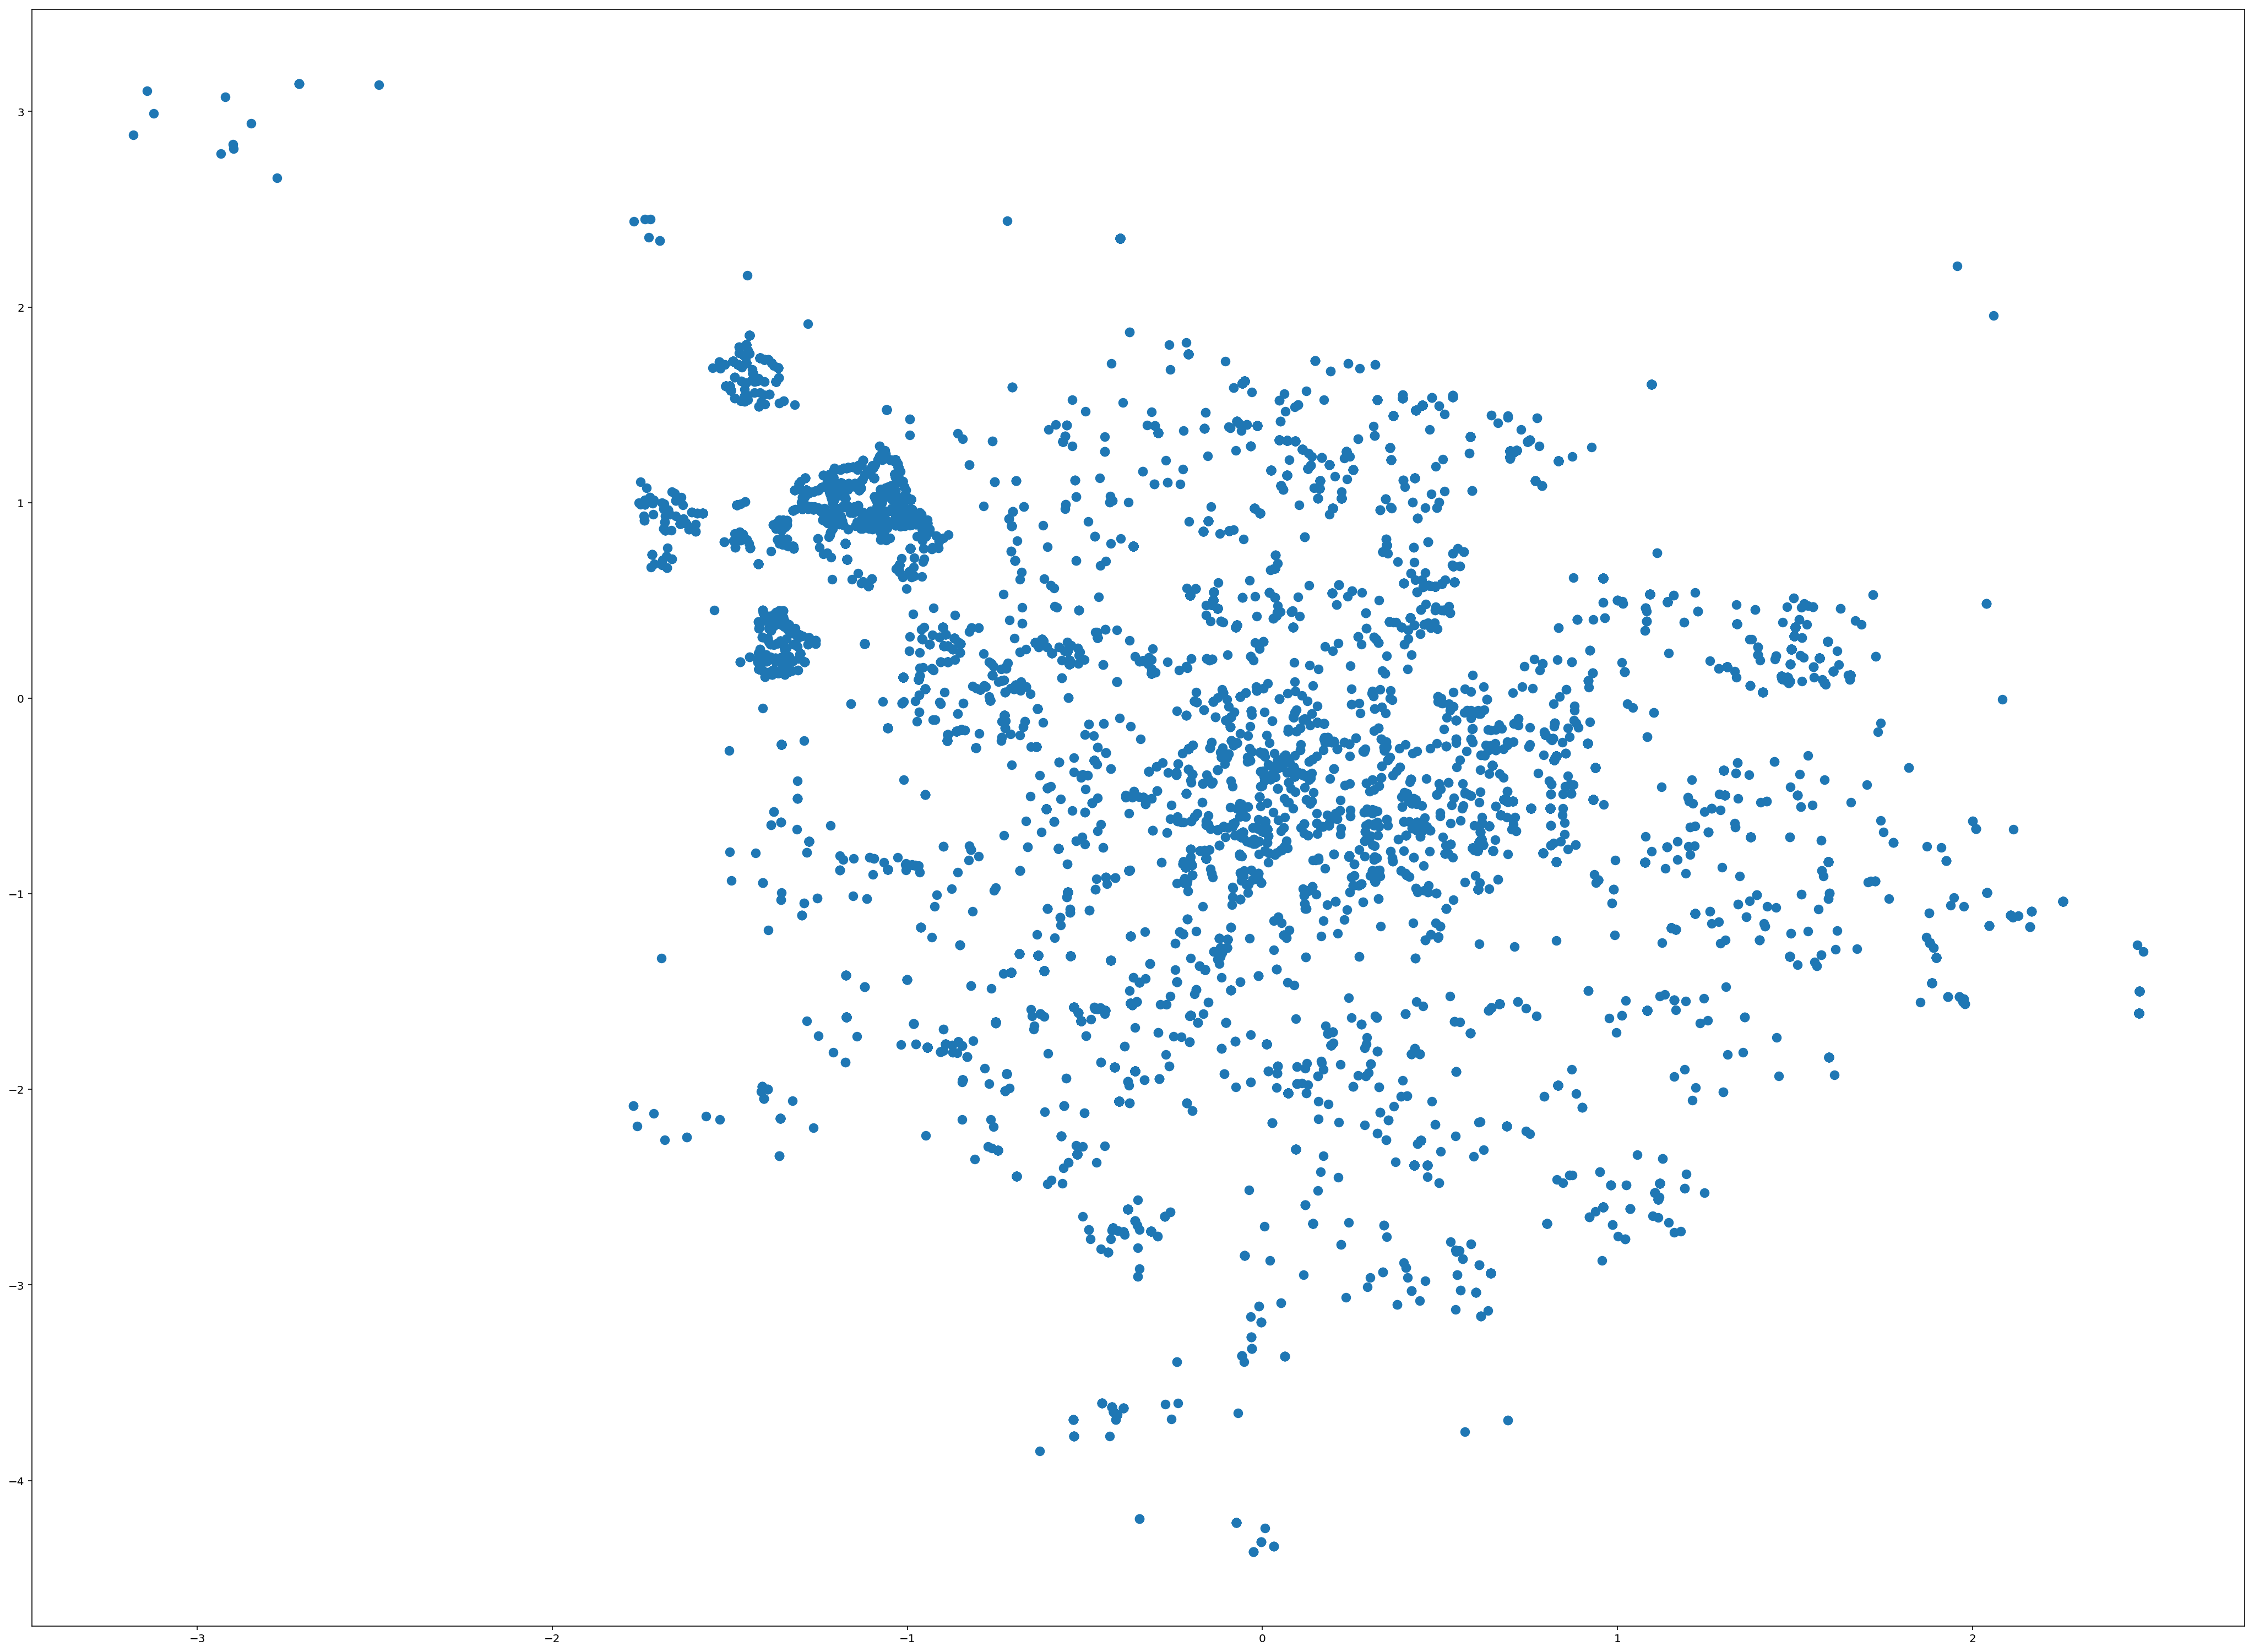

In [20]:
plt.scatter(Scaled_data[: , 0], Scaled_data[: , 1], cmap='autumn', s=60)

In [21]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [29]:
clustering = DBSCAN(eps = 0.02, min_samples= 5).fit_predict(Scaled_data)

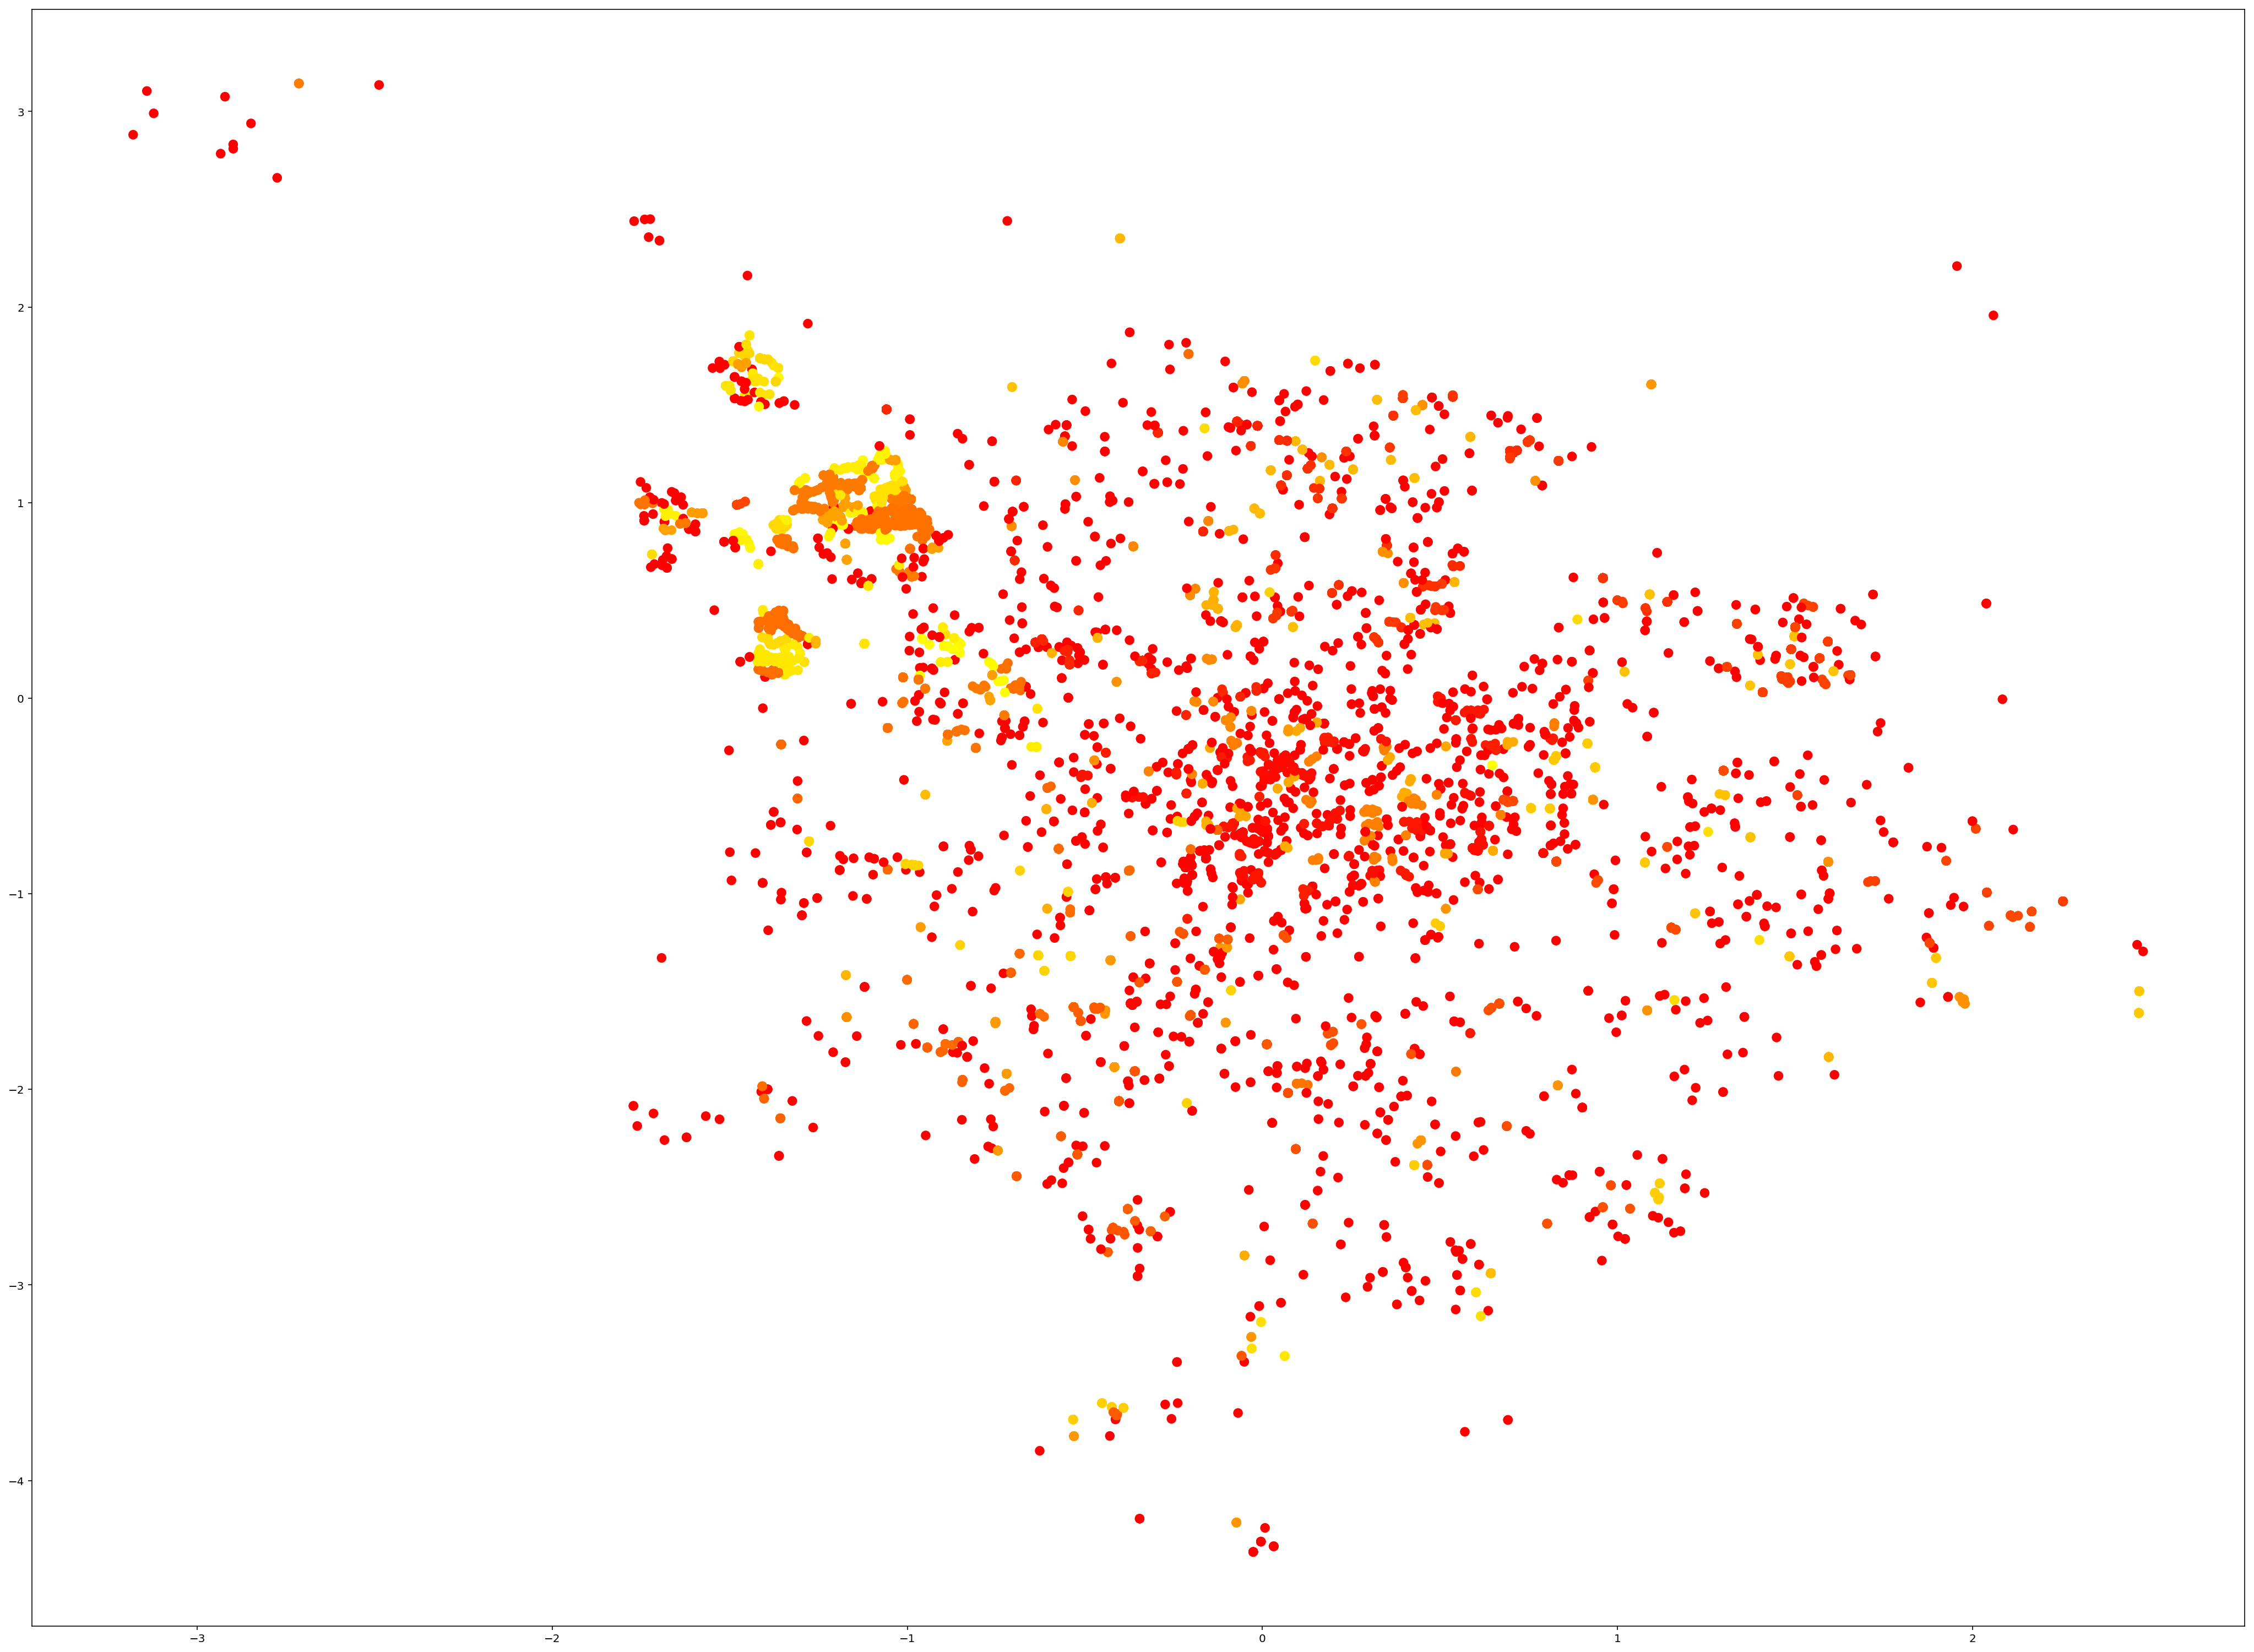

In [30]:
plt.scatter(Scaled_data[: , 0], Scaled_data[: , 1], c=clustering, cmap='autumn', s=60)

In [53]:
clustering1 = DBSCAN(algorithm='auto', eps = 0.2, metric='cosine', min_samples= 20).fit_predict(Scaled_data)

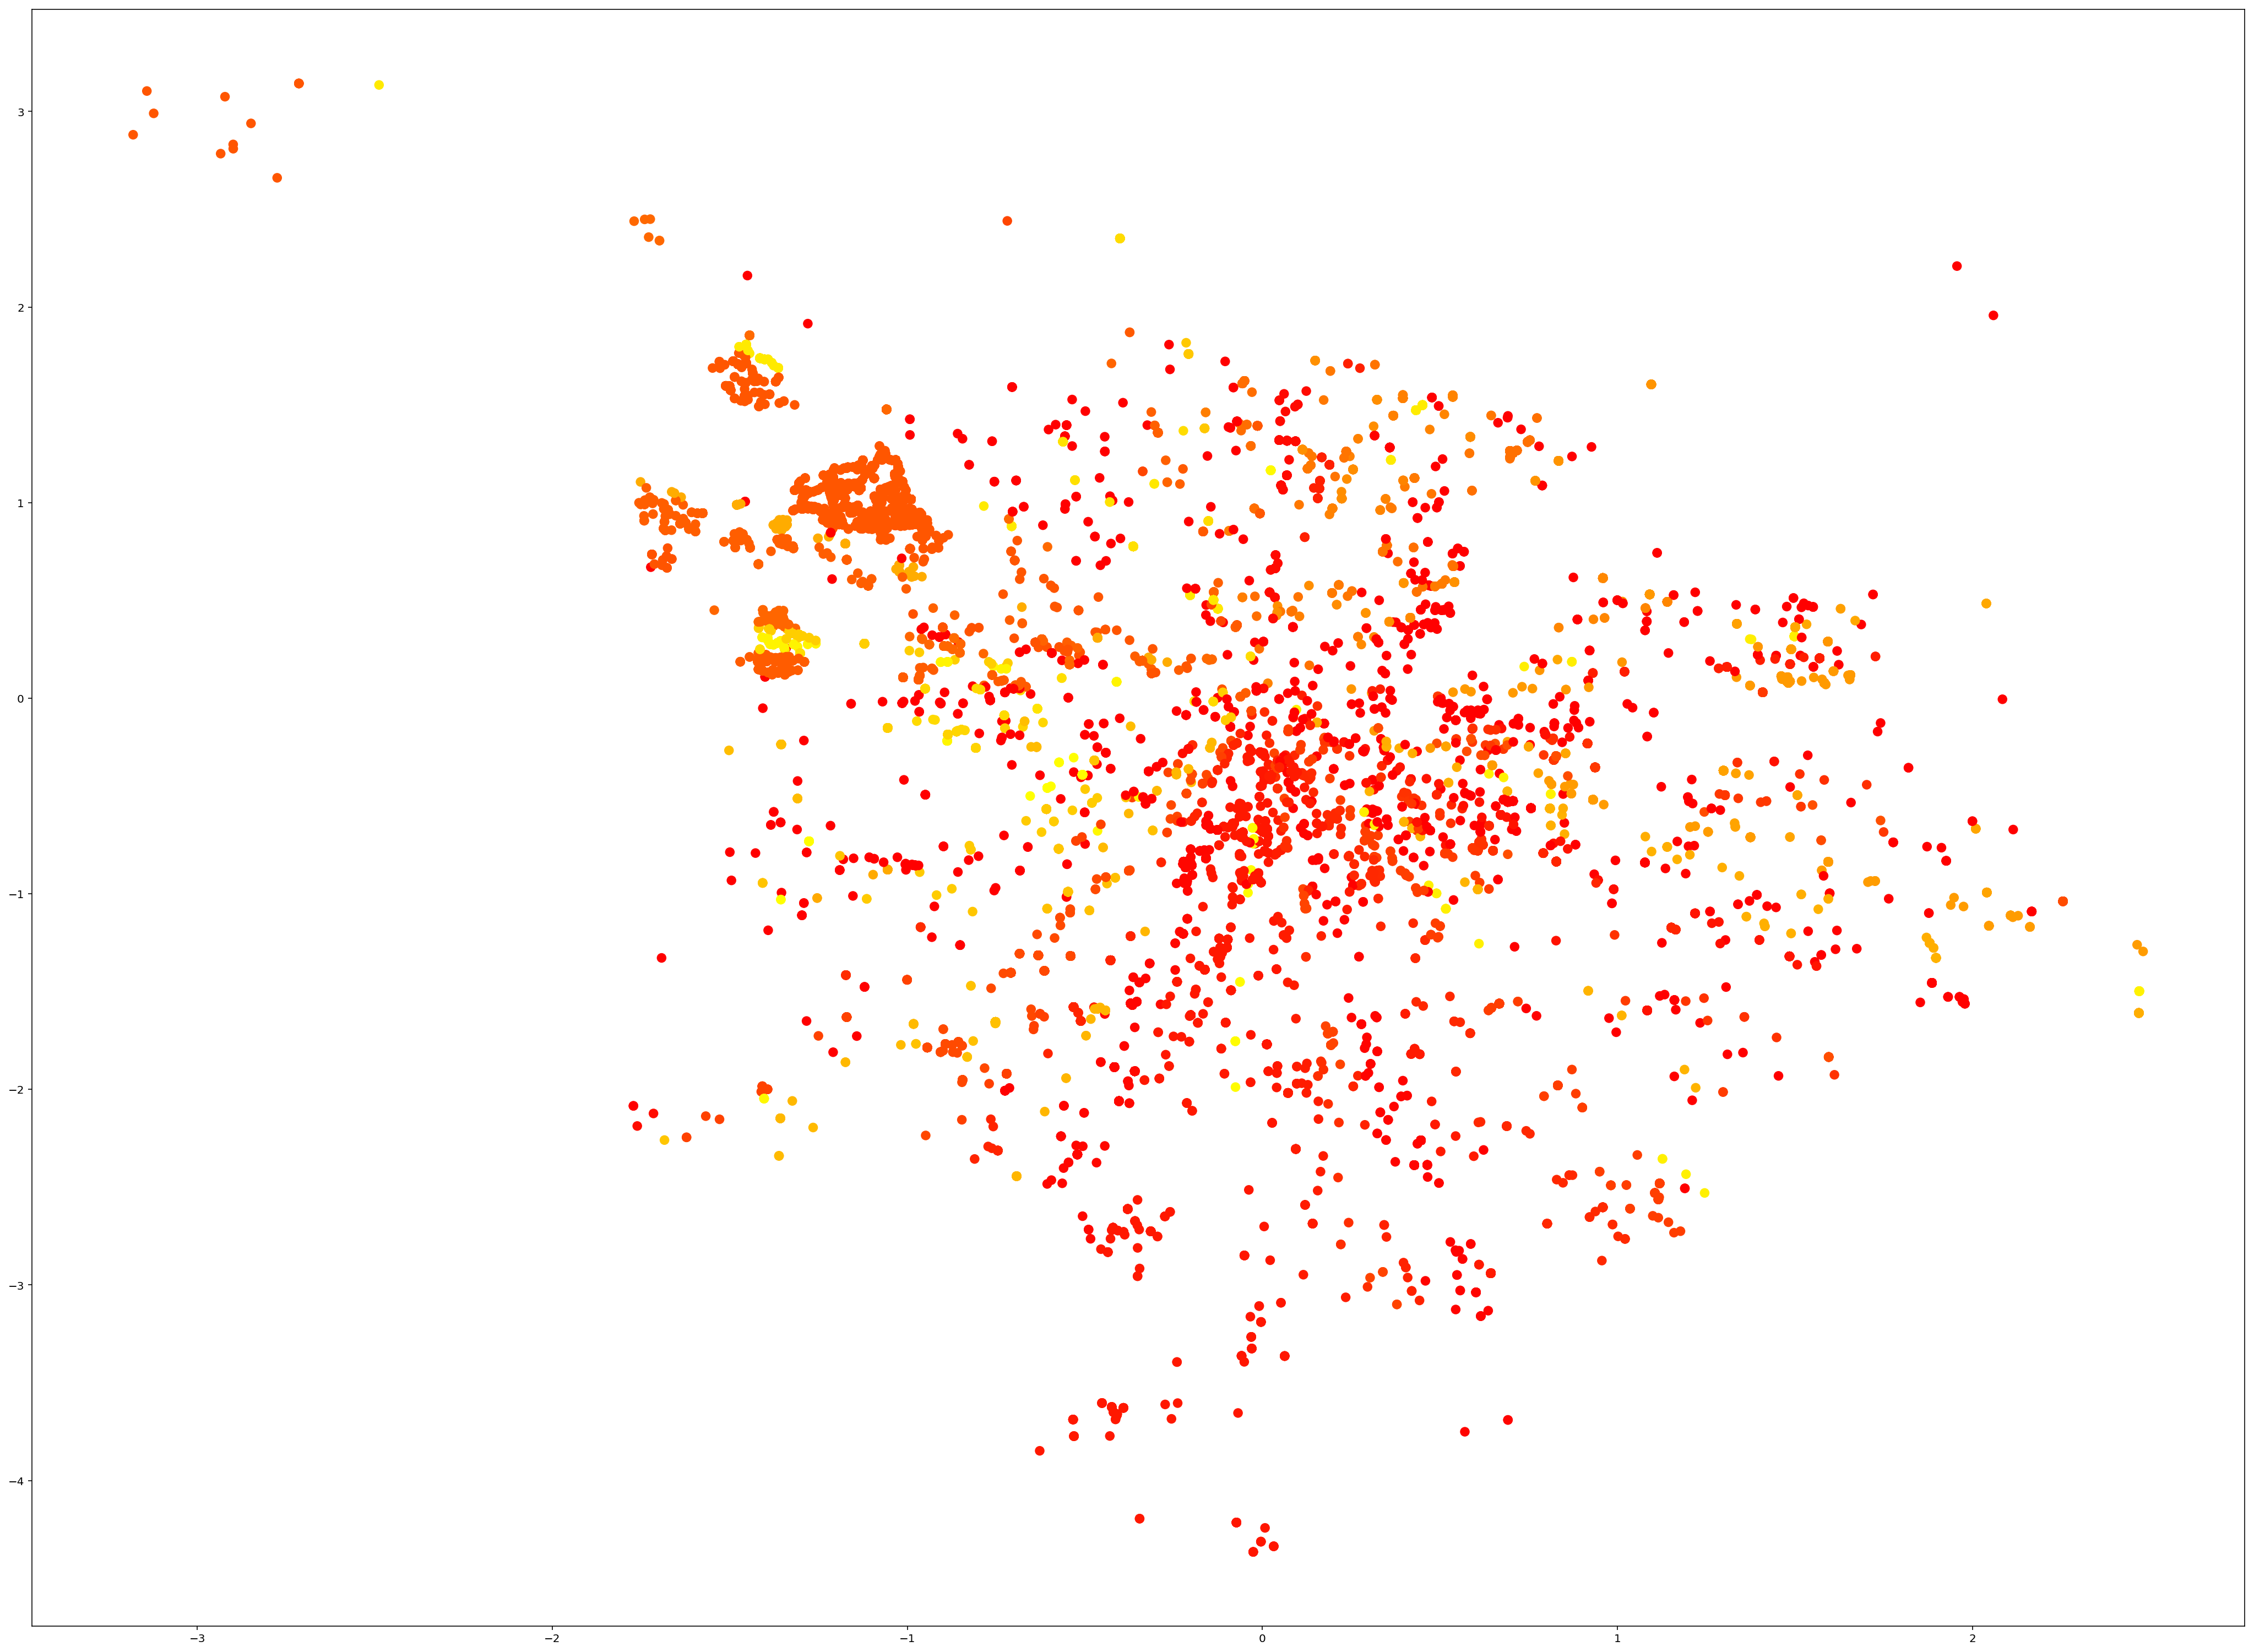

In [52]:
plt.scatter(Scaled_data[: , 0], Scaled_data[: , 1], c=clustering1, cmap='autumn', s=60)

In [54]:
data.head()

Unnamed: 0          x          y  comment_class  multiplier  \
0           0  37.612416  55.777454             -1           1   
1           1  37.612416  55.777454             -1           1   
2           2  37.603298  55.742108             -1           1   
3           3  37.558526  55.728758             -1           1   
4           4  37.566431  55.731794             -1           1   

                                             comment  
0  Во все разделы правил землепользования и застр...  
1  На основании вступившего в законную силу судеб...  
2  Внести в Проект правил землепользования и заст...  
3  Учитывая социальную значимость проекта строите...  
4  Учитывая социальную значимость проекта строите...

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70382 entries, 0 to 70381
Data columns (total 6 columns):
Unnamed: 0       70382 non-null int64
x                70382 non-null float64
y                70382 non-null float64
comment_class    70382 non-null int64
multiplier       70382 non-null int64
comment          70382 non-null object
dtypes: float64(2), int64(3), object(1)
memory usage: 3.2+ MB


In [60]:
len(data.x.unique())

2457

In [61]:
len(data_geo.x.unique())

2457

In [62]:
unique_data = data.copy()

In [64]:
unique_data['x_y'] = unique_data['x'] + unique_data['y']

In [65]:
unique_data.head()

Unnamed: 0          x          y  comment_class  multiplier  \
0           0  37.612416  55.777454             -1           1   
1           1  37.612416  55.777454             -1           1   
2           2  37.603298  55.742108             -1           1   
3           3  37.558526  55.728758             -1           1   
4           4  37.566431  55.731794             -1           1   

                                             comment        x_y  
0  Во все разделы правил землепользования и застр...  93.389870  
1  На основании вступившего в законную силу судеб...  93.389870  
2  Внести в Проект правил землепользования и заст...  93.345406  
3  Учитывая социальную значимость проекта строите...  93.287284  
4  Учитывая социальную значимость проекта строите...  93.298225

In [67]:
len(unique_data['x_y'].unique())

2534

In [22]:
len(data_geo.y.unique())

2472

In [23]:
data_wo_duplicates = data.drop_duplicates(subset = ['x', 'y'], keep = 'first')

In [24]:
data_wo_duplicates.head()

Unnamed: 0          x          y  comment_class  multiplier  \
0           0  37.612416  55.777454             -1           1   
2           2  37.603298  55.742108             -1           1   
3           3  37.558526  55.728758             -1           1   
4           4  37.566431  55.731794             -1           1   
7           7  37.558957  55.723399             -1           1   

                                             comment  
0  Во все разделы правил землепользования и застр...  
2  Внести в Проект правил землепользования и заст...  
3  Учитывая социальную значимость проекта строите...  
4  Учитывая социальную значимость проекта строите...  
7  Прошу поменять зону сохранения нахождения объе...

In [25]:
data_wo_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2542 entries, 0 to 70370
Data columns (total 6 columns):
Unnamed: 0       2542 non-null int64
x                2542 non-null float64
y                2542 non-null float64
comment_class    2542 non-null int64
multiplier       2542 non-null int64
comment          2542 non-null object
dtypes: float64(2), int64(3), object(1)
memory usage: 139.0+ KB


In [26]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (36, 27)

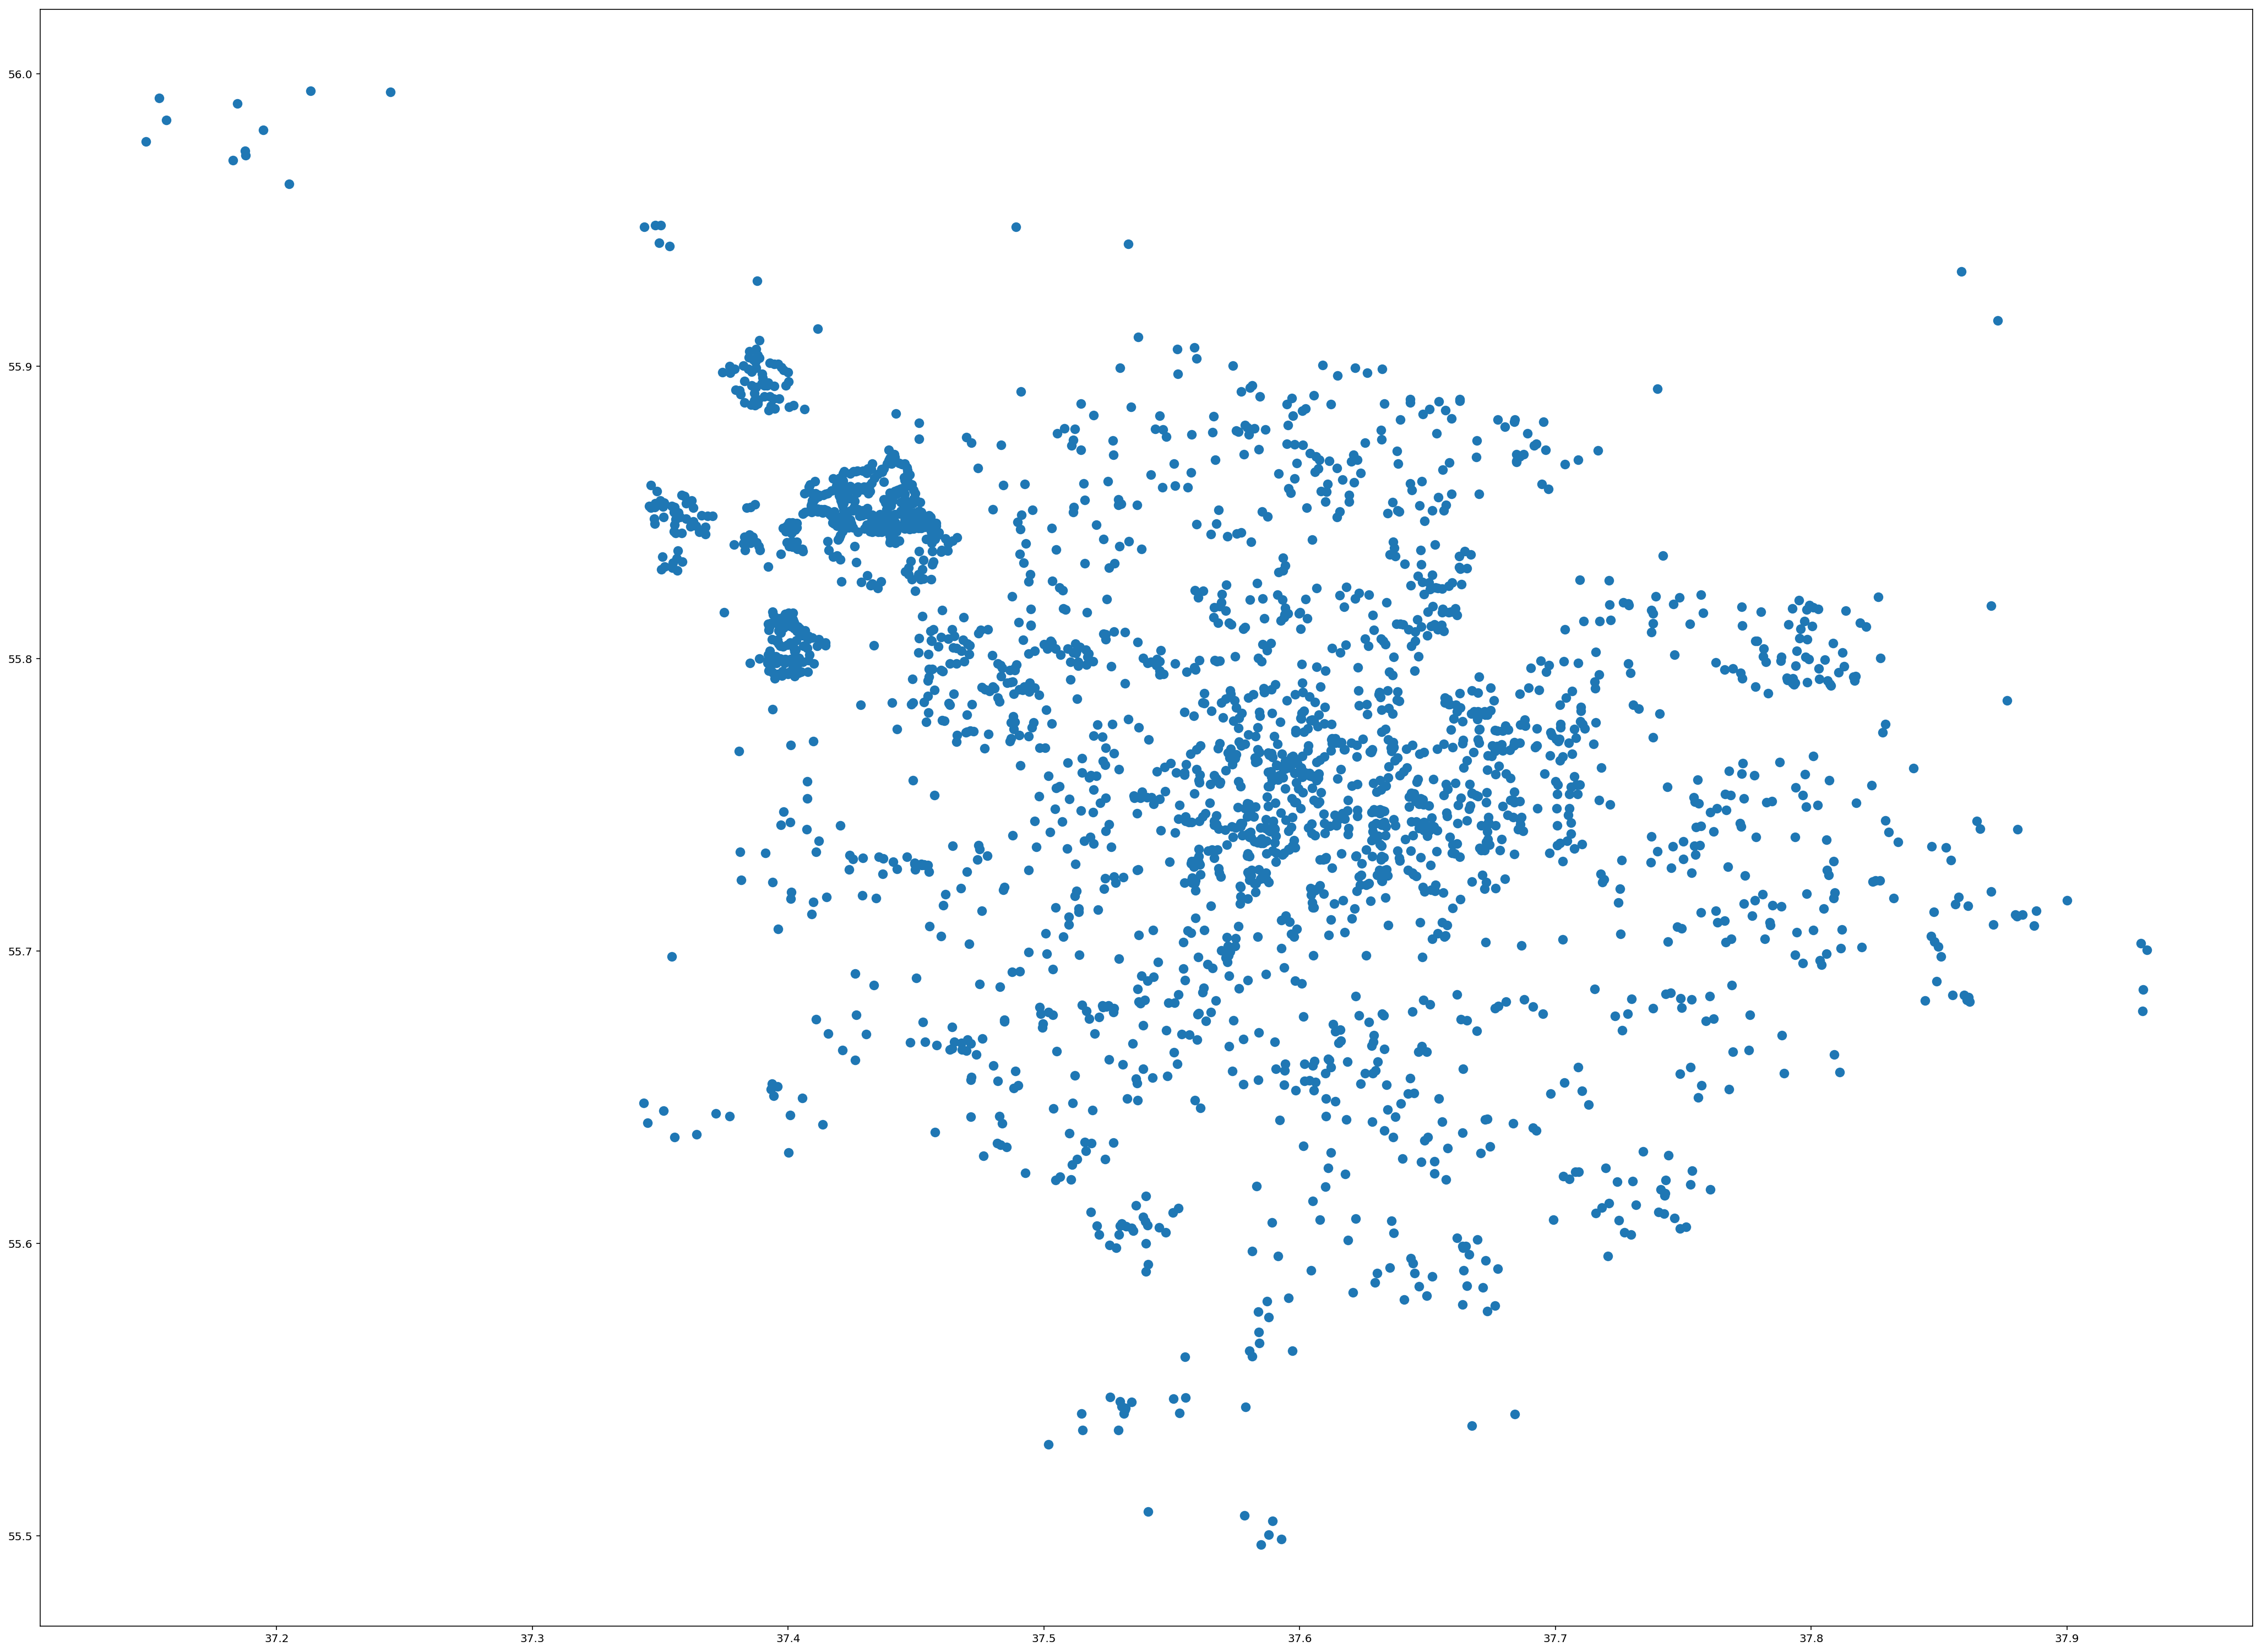

In [27]:
plt.scatter(data_wo_duplicates.x, data_wo_duplicates.y, cmap='autumn', s=60)

In [28]:
data_wo_duplicates.drop('Unnamed: 0', axis = 1, inplace = True)
data_wo_duplicates.drop('comment_class', axis = 1, inplace = True)
data_wo_duplicates.drop('multiplier', axis = 1, inplace = True)
data_wo_duplicates.drop('comment', axis = 1, inplace = True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [29]:
data_wo_duplicates.head()

x          y
0  37.612416  55.777454
2  37.603298  55.742108
3  37.558526  55.728758
4  37.566431  55.731794
7  37.558957  55.723399

In [30]:
Scaled_data = scaler.fit_transform(data_wo_duplicates)

In [31]:
Scaled_data

array([[ 0.37627854,  0.08832313],
       [ 0.30192995, -0.36767968],
       [-0.06314302, -0.53990956],
       ...,
       [ 0.88243283, -1.77473979],
       [ 0.85130068, -1.80207725],
       [-0.61895545,  0.04149209]])

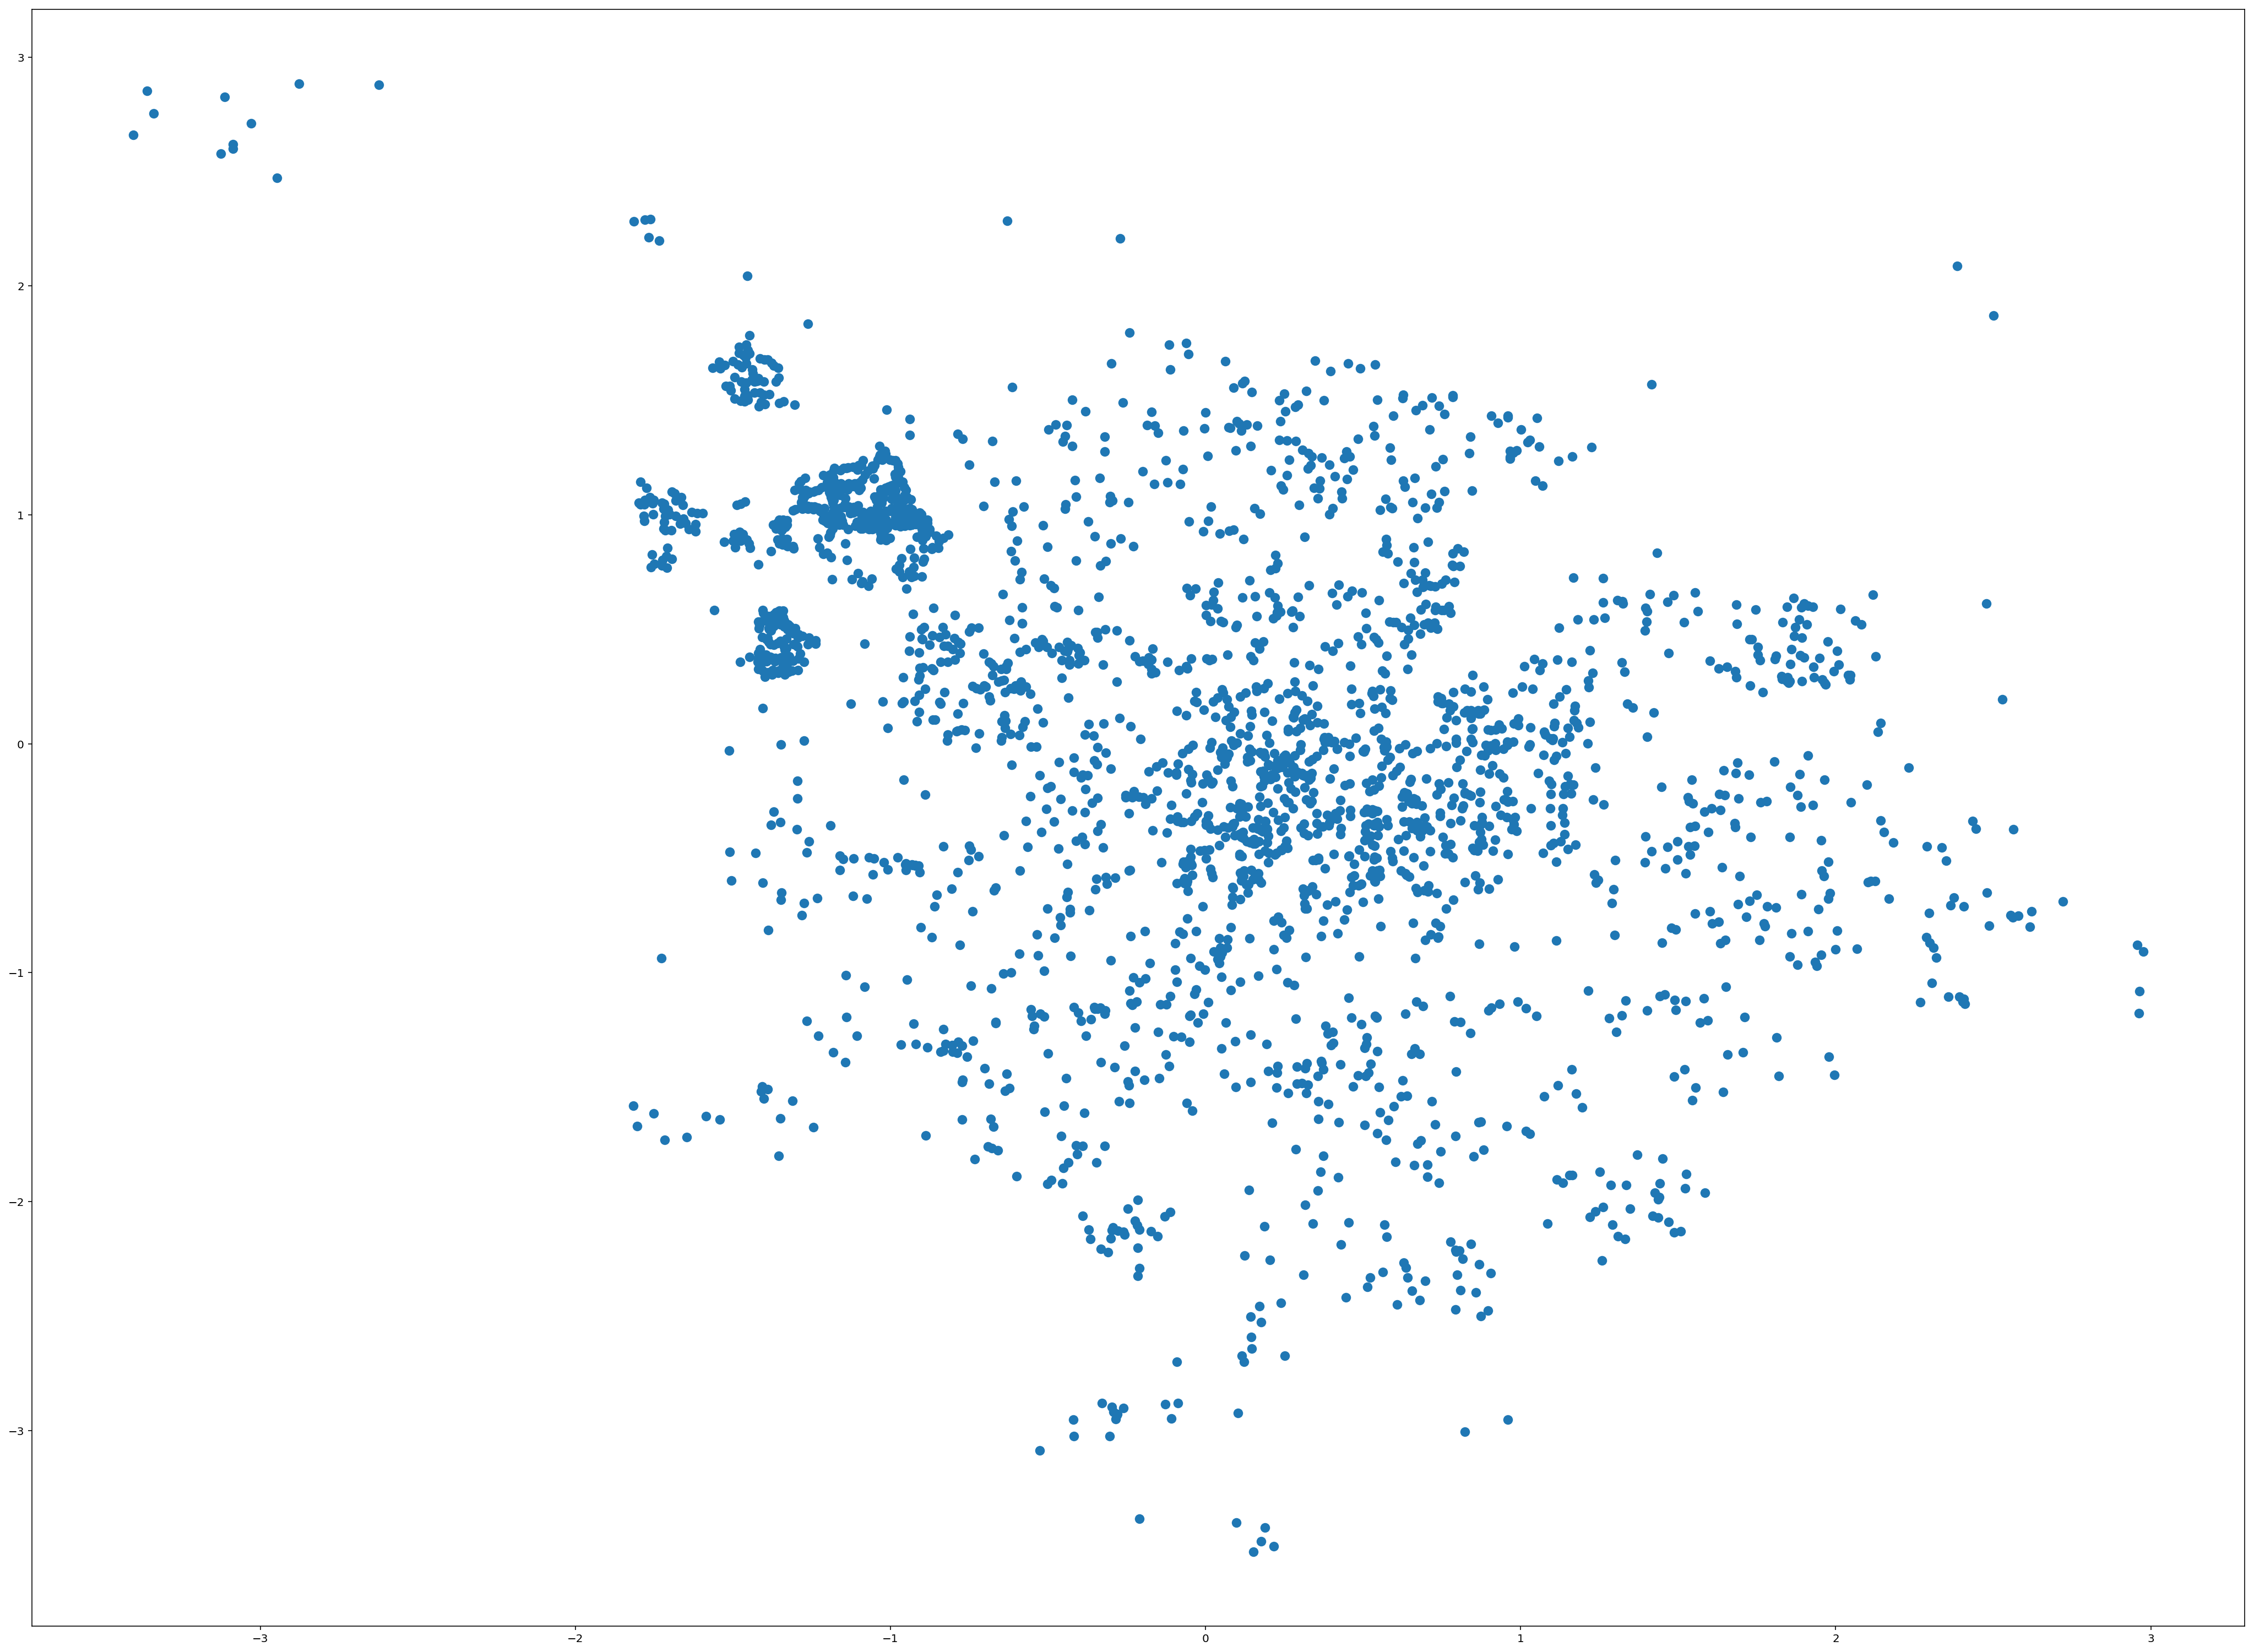

In [34]:
plt.scatter(Scaled_data[: , 0], Scaled_data[: , 1], cmap='autumn', s=60)

In [37]:
clusters = DBSCAN().fit_predict(Scaled_data)

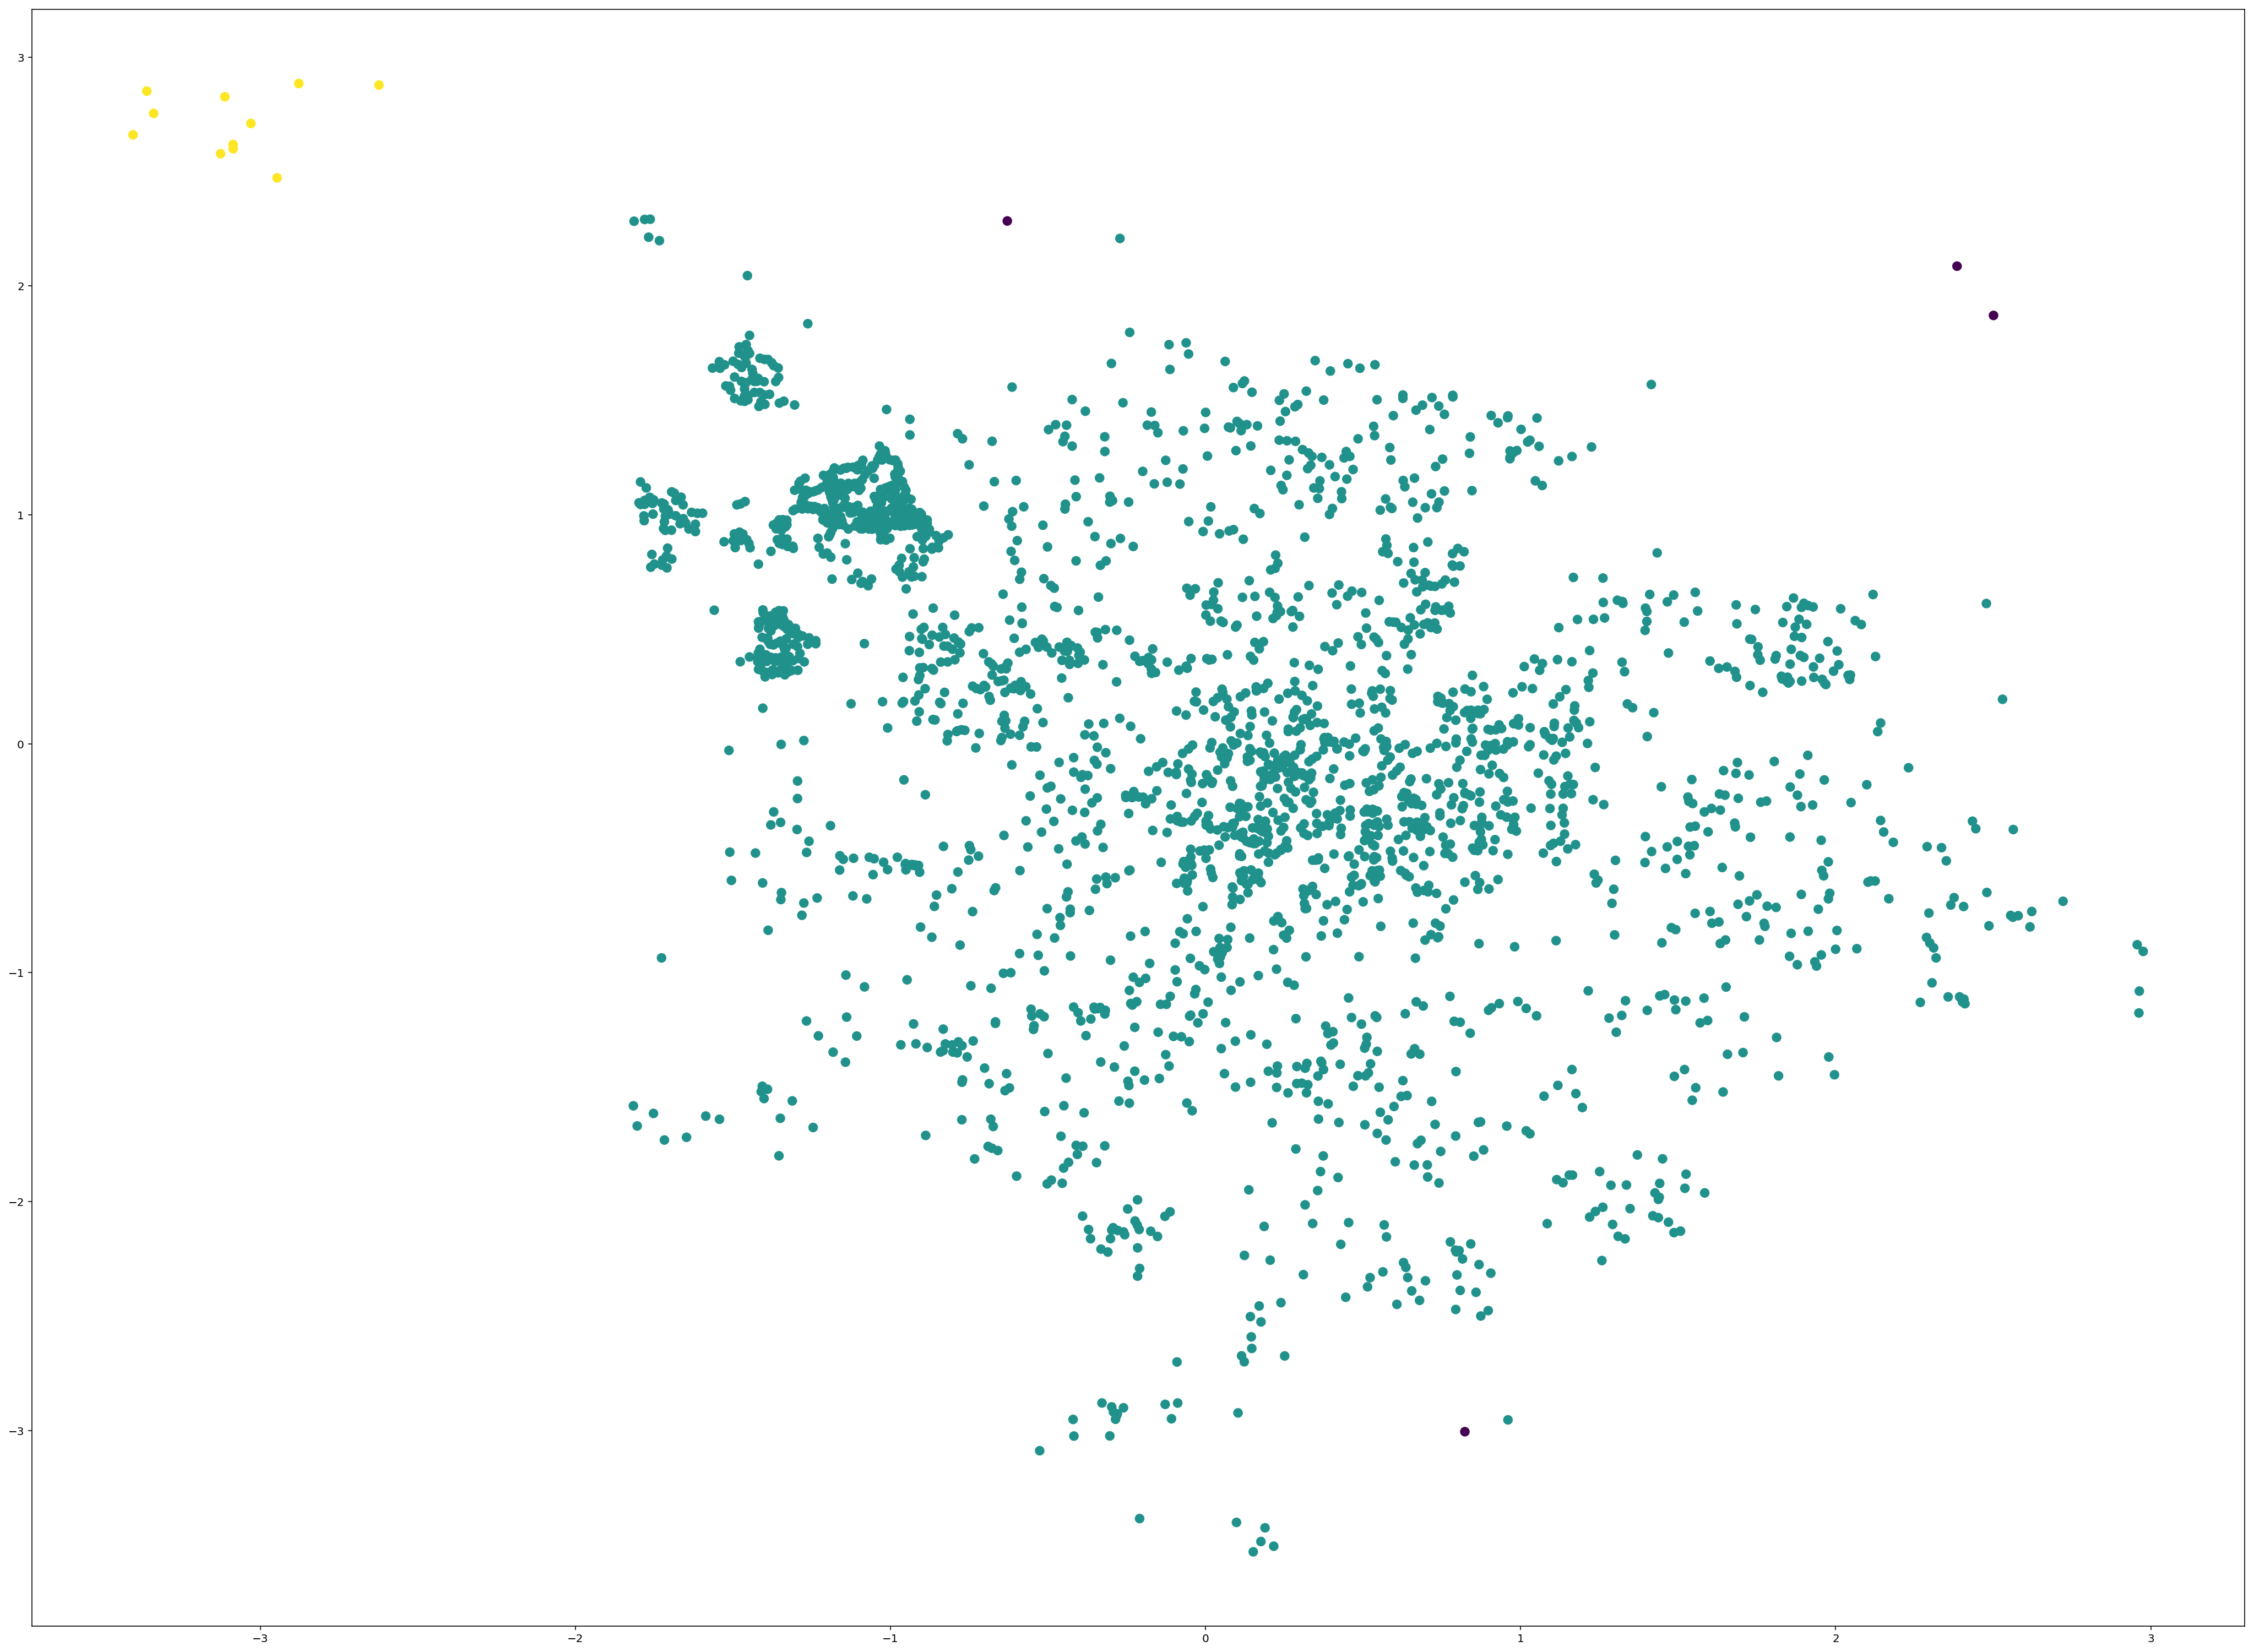

In [39]:
plt.scatter(Scaled_data[: , 0], Scaled_data[: , 1], c=clusters, s=60)

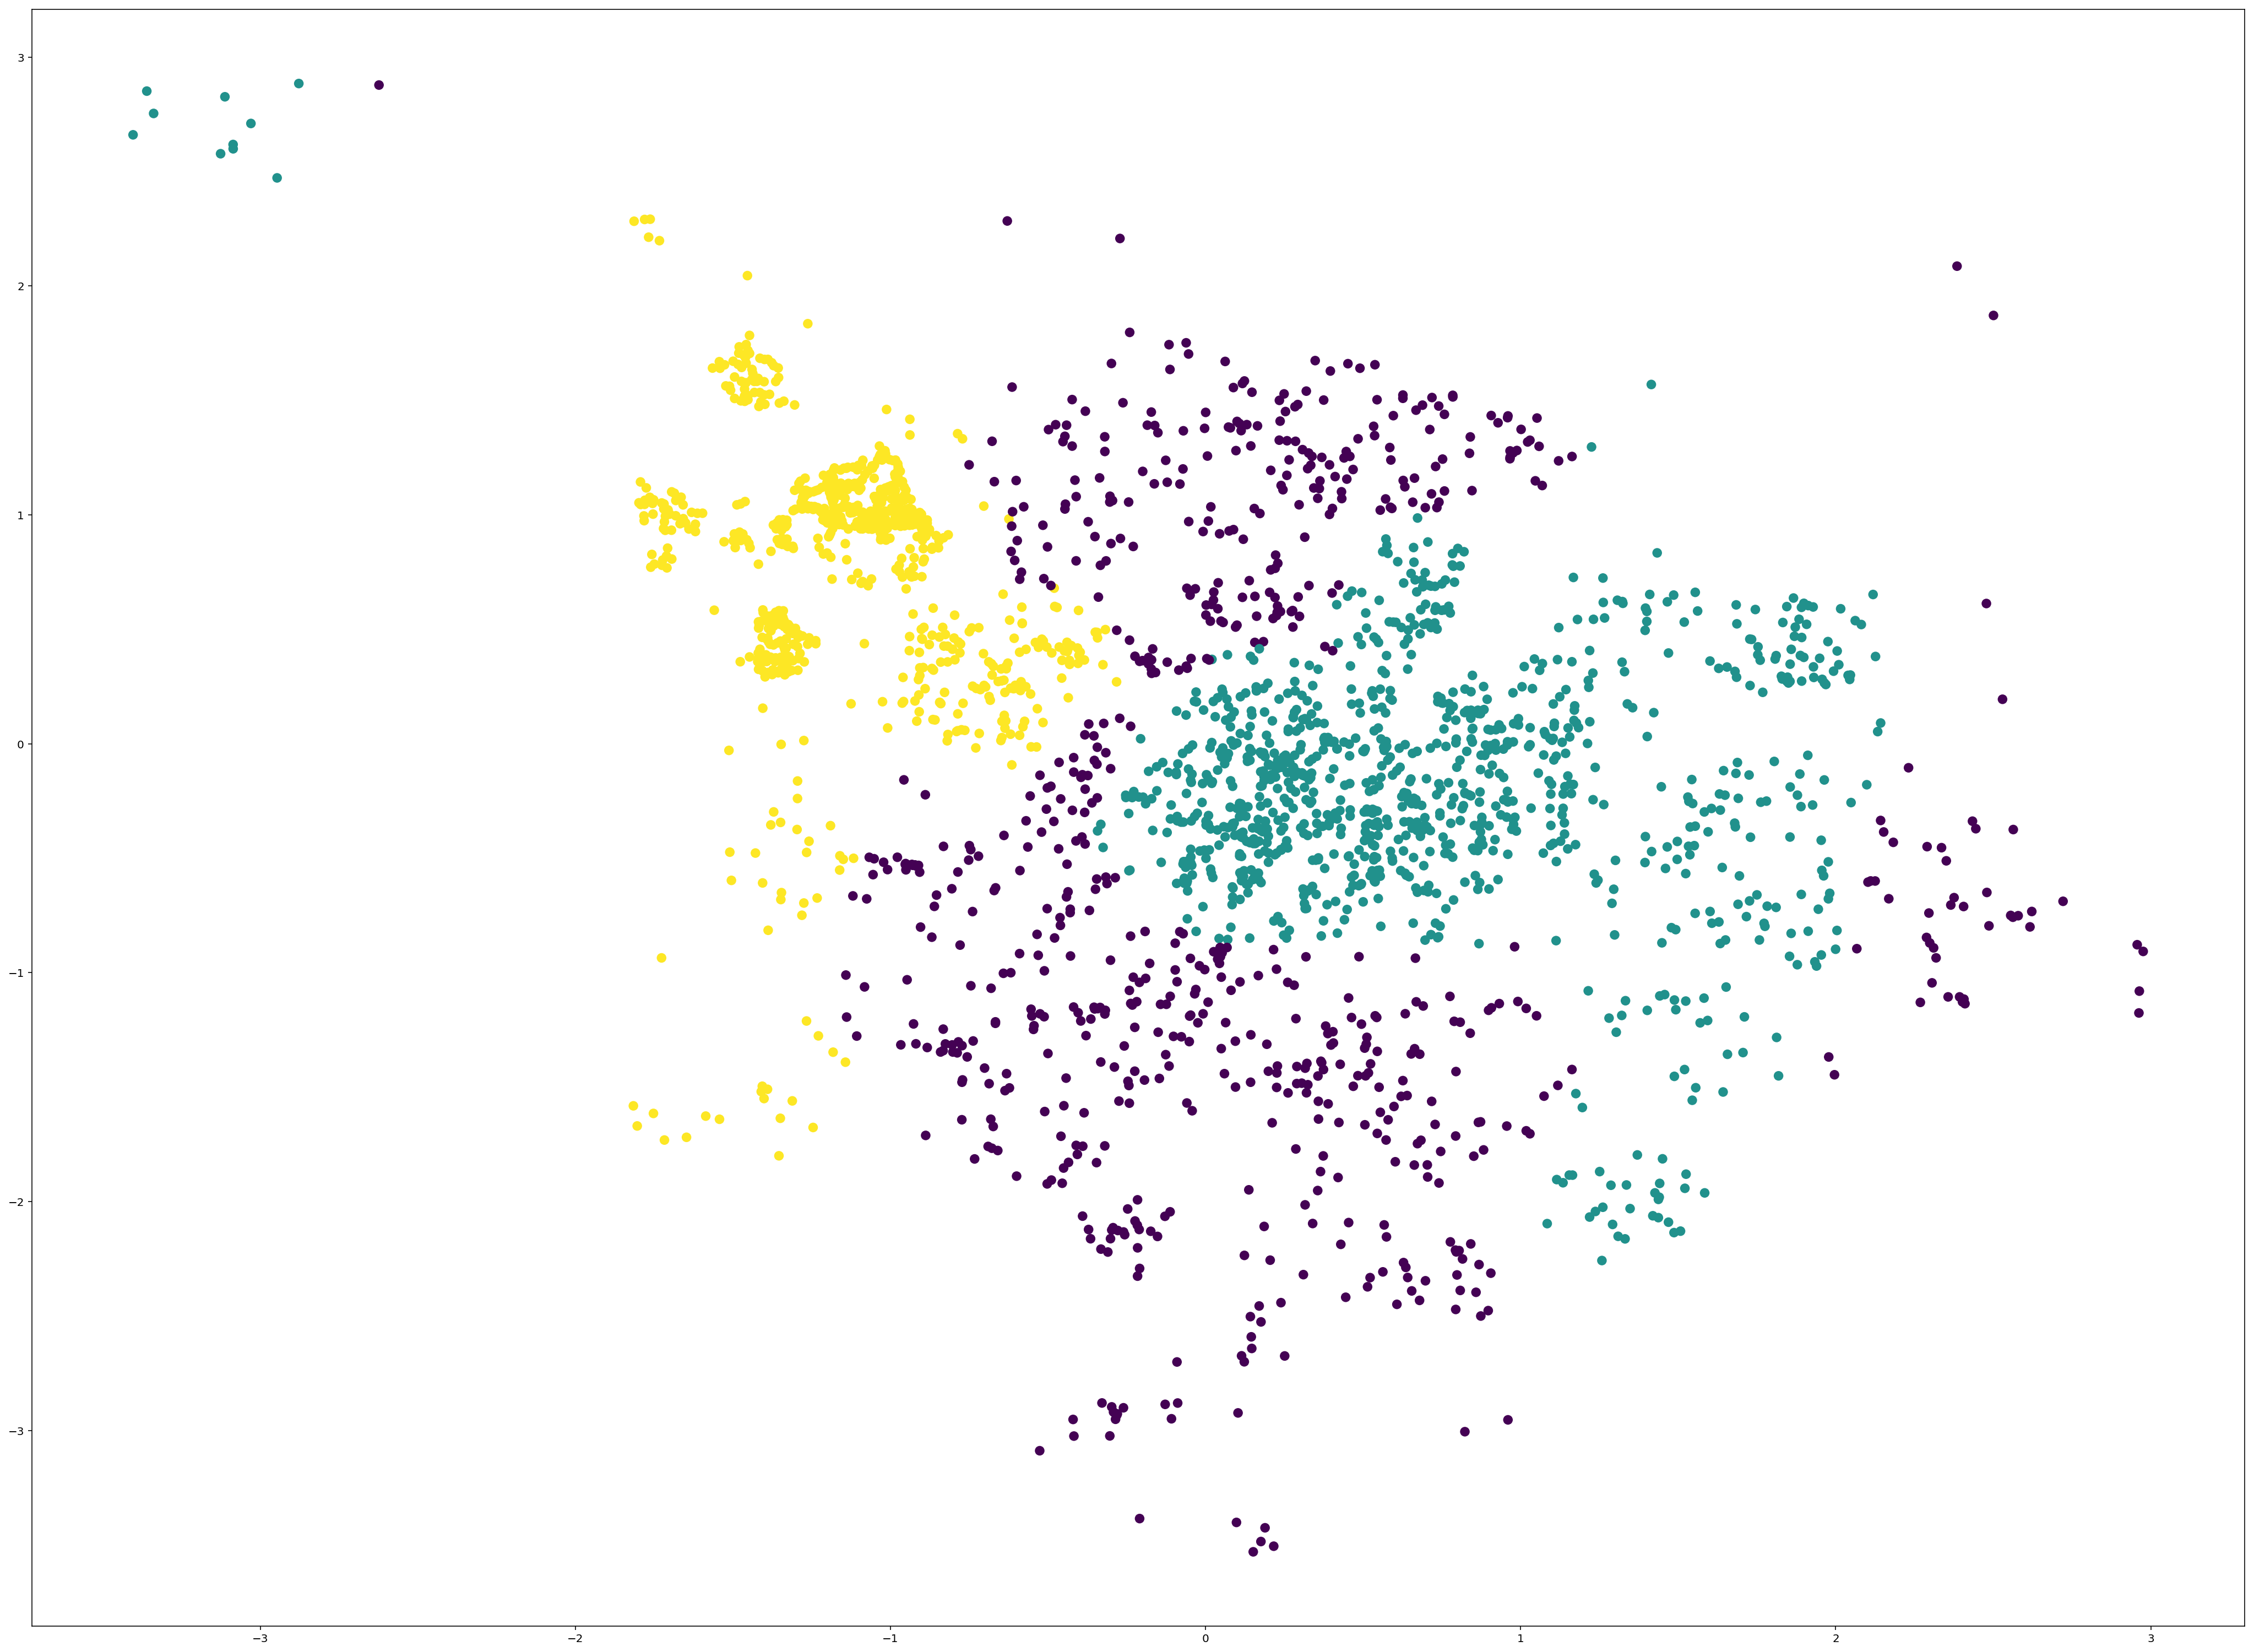

In [103]:
clusters_dbscan = DBSCAN(eps=0.2, min_samples=50, metric = 'haversine', n_jobs=1).fit_predict(Scaled_data)
plt.scatter(Scaled_data[: , 0], Scaled_data[: , 1], c=clusters_dbscan, s=60)

In [65]:
data_wo_duplicates2 = data.drop_duplicates(subset = ['x', 'y'], keep = 'first')

In [66]:
data_wo_duplicates2.head()

Unnamed: 0          x          y  comment_class  multiplier  \
0           0  37.612416  55.777454             -1           1   
2           2  37.603298  55.742108             -1           1   
3           3  37.558526  55.728758             -1           1   
4           4  37.566431  55.731794             -1           1   
7           7  37.558957  55.723399             -1           1   

                                             comment  
0  Во все разделы правил землепользования и застр...  
2  Внести в Проект правил землепользования и заст...  
3  Учитывая социальную значимость проекта строите...  
4  Учитывая социальную значимость проекта строите...  
7  Прошу поменять зону сохранения нахождения объе...

In [67]:
filtered_data_za = data_wo_duplicates2[ (data_wo_duplicates2['comment_class']==1)]

In [68]:
filtered_data_protiv = data_wo_duplicates2[ (data_wo_duplicates2['comment_class']==-1)]

In [69]:
filtered_data_za.head()

Unnamed: 0          x          y  comment_class  multiplier  \
142         142  37.616243  55.733229              1           1   
457         457  37.588090  55.761092              1           1   
460         460  37.588754  55.761350              1           1   
503         503  37.604080  55.759917              1           1   
508         508  37.558463  55.729564              1           1   

                                               comment  
142  Земельный участок по адресу: г. Москва, ЦАО, 1...  
457  Я Журавлева Лариса Николаевна. Проживающая по ...  
460  Я Кинзишев Баграт Юрьевич, проживающий по адре...  
503  Я Цыганова Надежда Васильевна, проживающий по ...  
508  Поддерживаю и заинтересован в формировании зон...

In [70]:
filtered_data_protiv.head()

Unnamed: 0          x          y  comment_class  multiplier  \
0           0  37.612416  55.777454             -1           1   
2           2  37.603298  55.742108             -1           1   
3           3  37.558526  55.728758             -1           1   
4           4  37.566431  55.731794             -1           1   
7           7  37.558957  55.723399             -1           1   

                                             comment  
0  Во все разделы правил землепользования и застр...  
2  Внести в Проект правил землепользования и заст...  
3  Учитывая социальную значимость проекта строите...  
4  Учитывая социальную значимость проекта строите...  
7  Прошу поменять зону сохранения нахождения объе...

In [72]:
len(filtered_data_za)

918

In [73]:
len(filtered_data_protiv)

1624

In [74]:
filtered_data_za.drop('Unnamed: 0', axis = 1, inplace = True)
filtered_data_za.drop('comment_class', axis = 1, inplace = True)
filtered_data_za.drop('multiplier', axis = 1, inplace = True)
filtered_data_za.drop('comment', axis = 1, inplace = True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [75]:
filtered_data_protiv.drop('Unnamed: 0', axis = 1, inplace = True)
filtered_data_protiv.drop('comment_class', axis = 1, inplace = True)
filtered_data_protiv.drop('multiplier', axis = 1, inplace = True)
filtered_data_protiv.drop('comment', axis = 1, inplace = True)

In [76]:
Scaled_data_za = scaler.fit_transform(filtered_data_za)
Scaled_data_protiv = scaler.fit_transform(filtered_data_protiv)

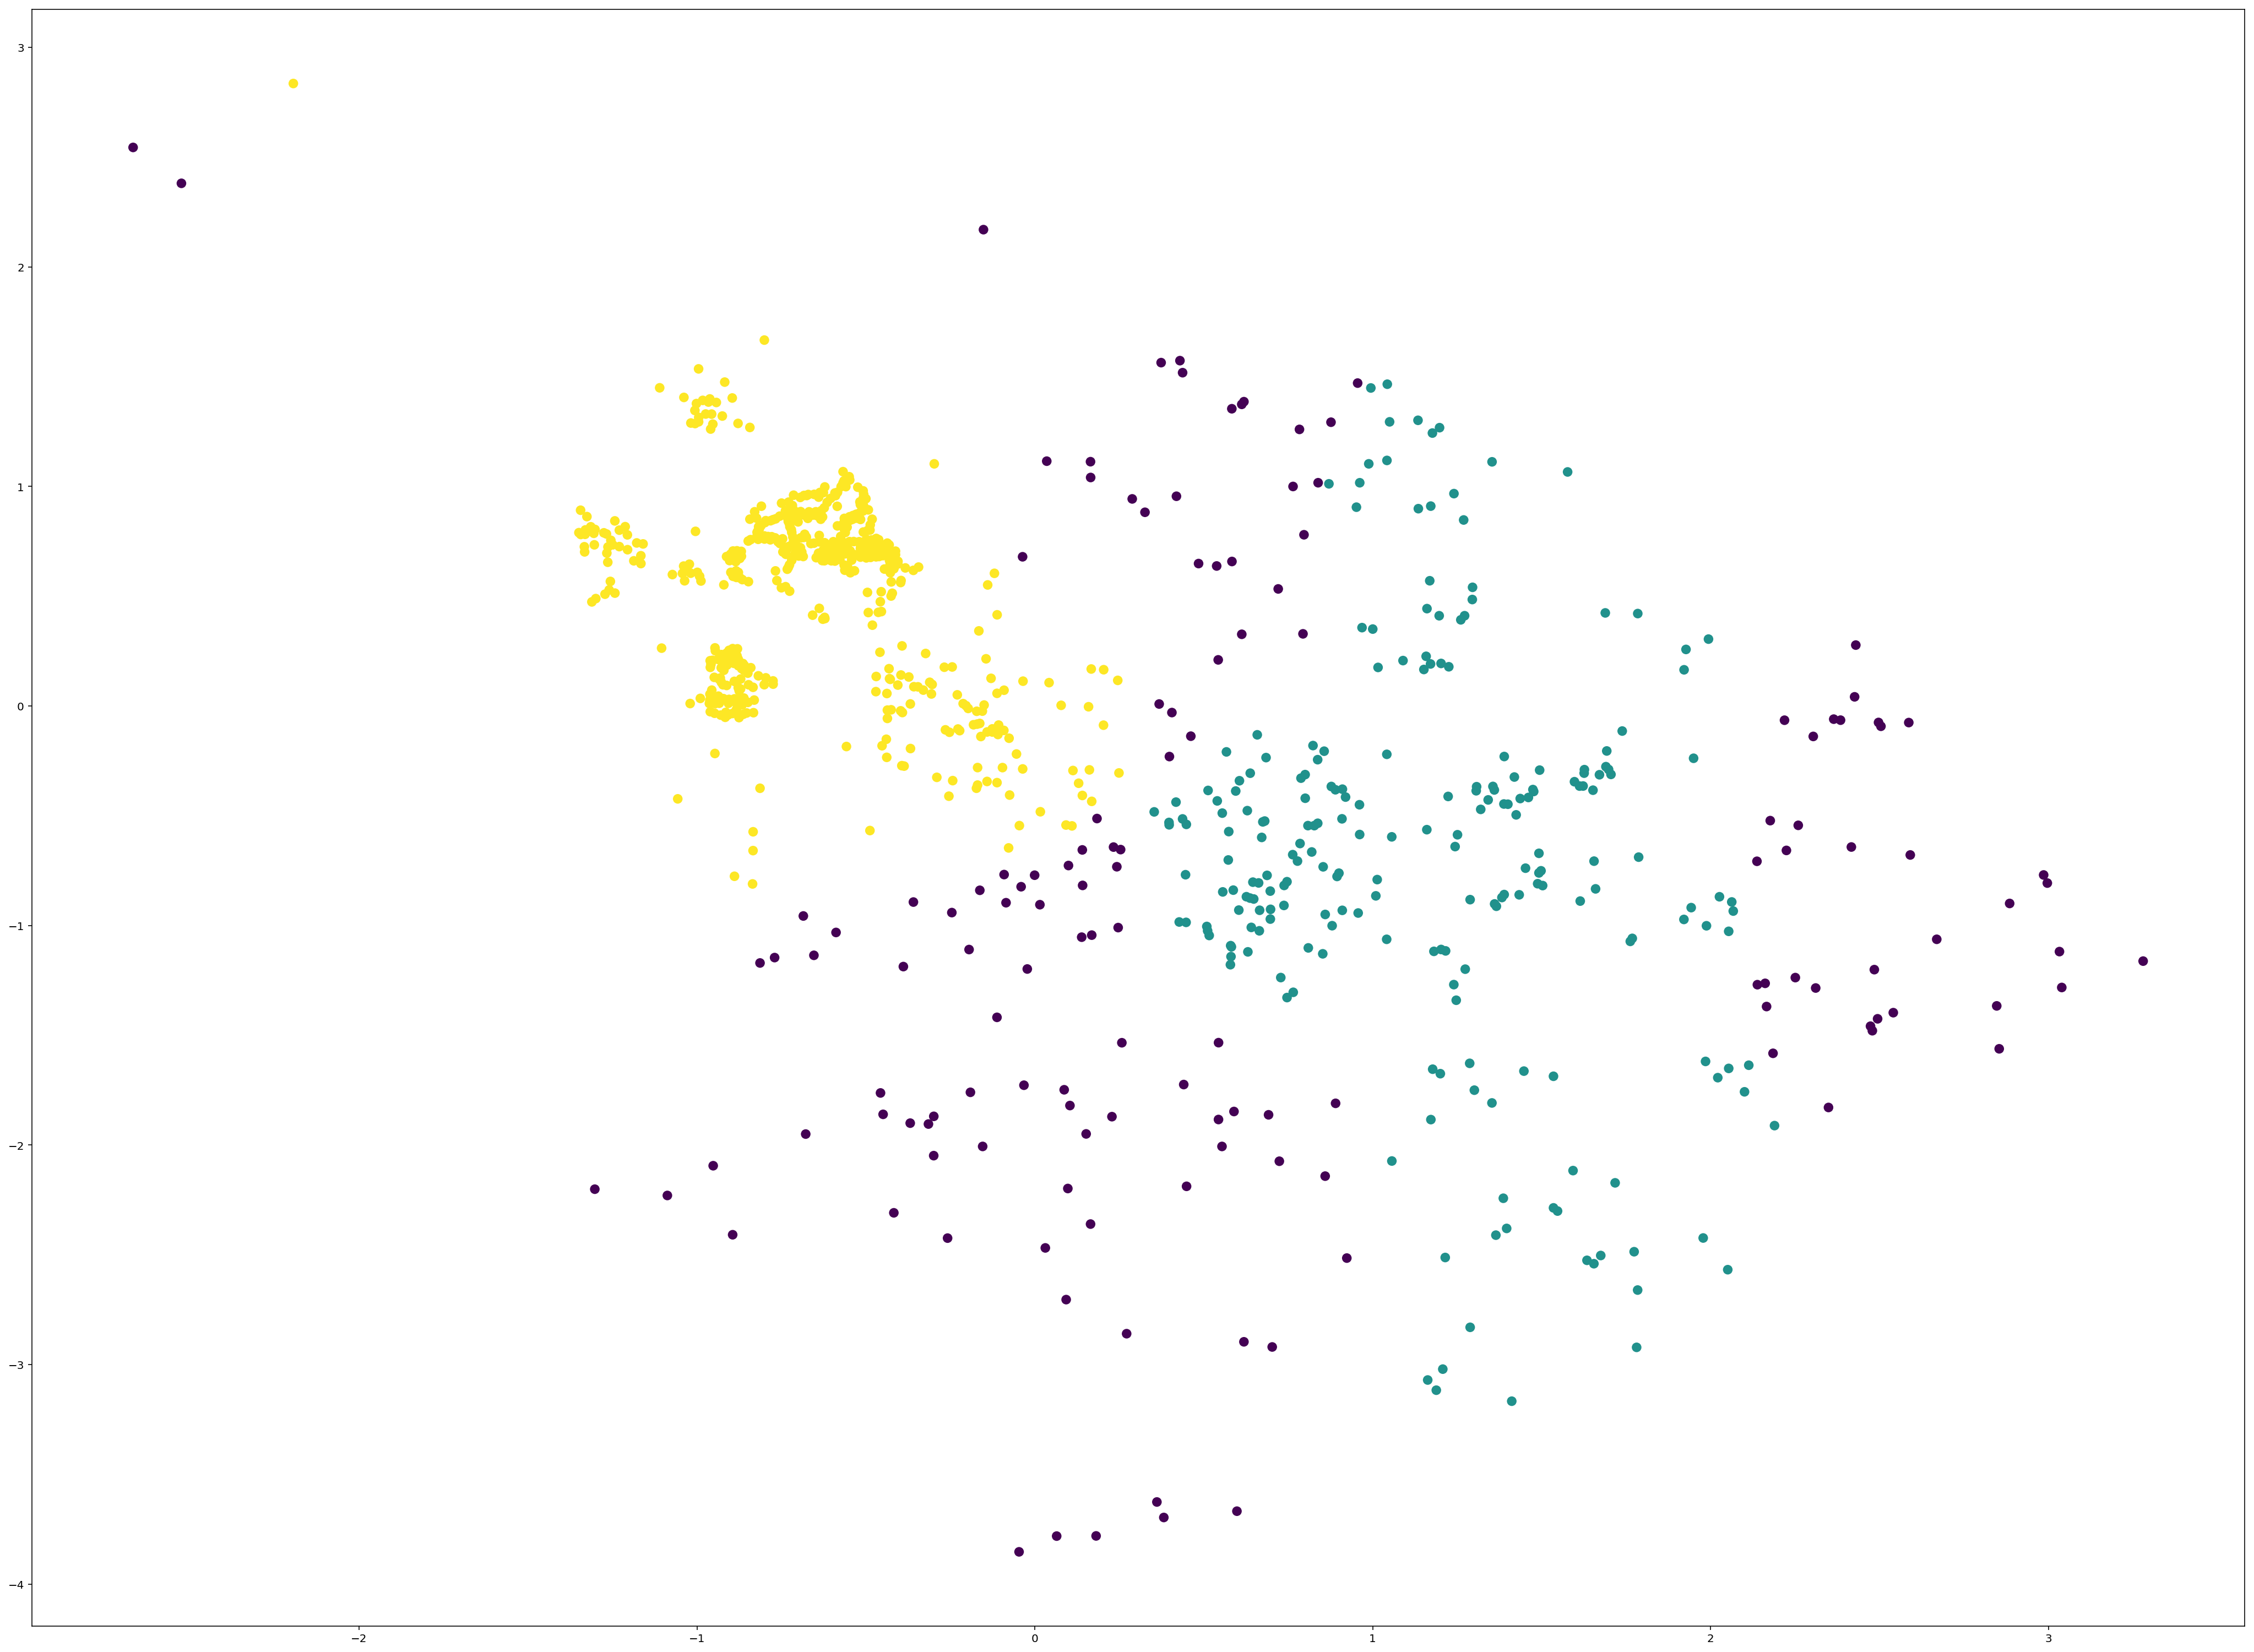

In [94]:
clusters_dbscan_za = DBSCAN(eps=0.3, min_samples=40, metric = 'haversine', leaf_size=30).fit_predict(Scaled_data_za)
plt.scatter(Scaled_data_za[: , 0], Scaled_data_za[: , 1], c=clusters_dbscan_za, s=60)

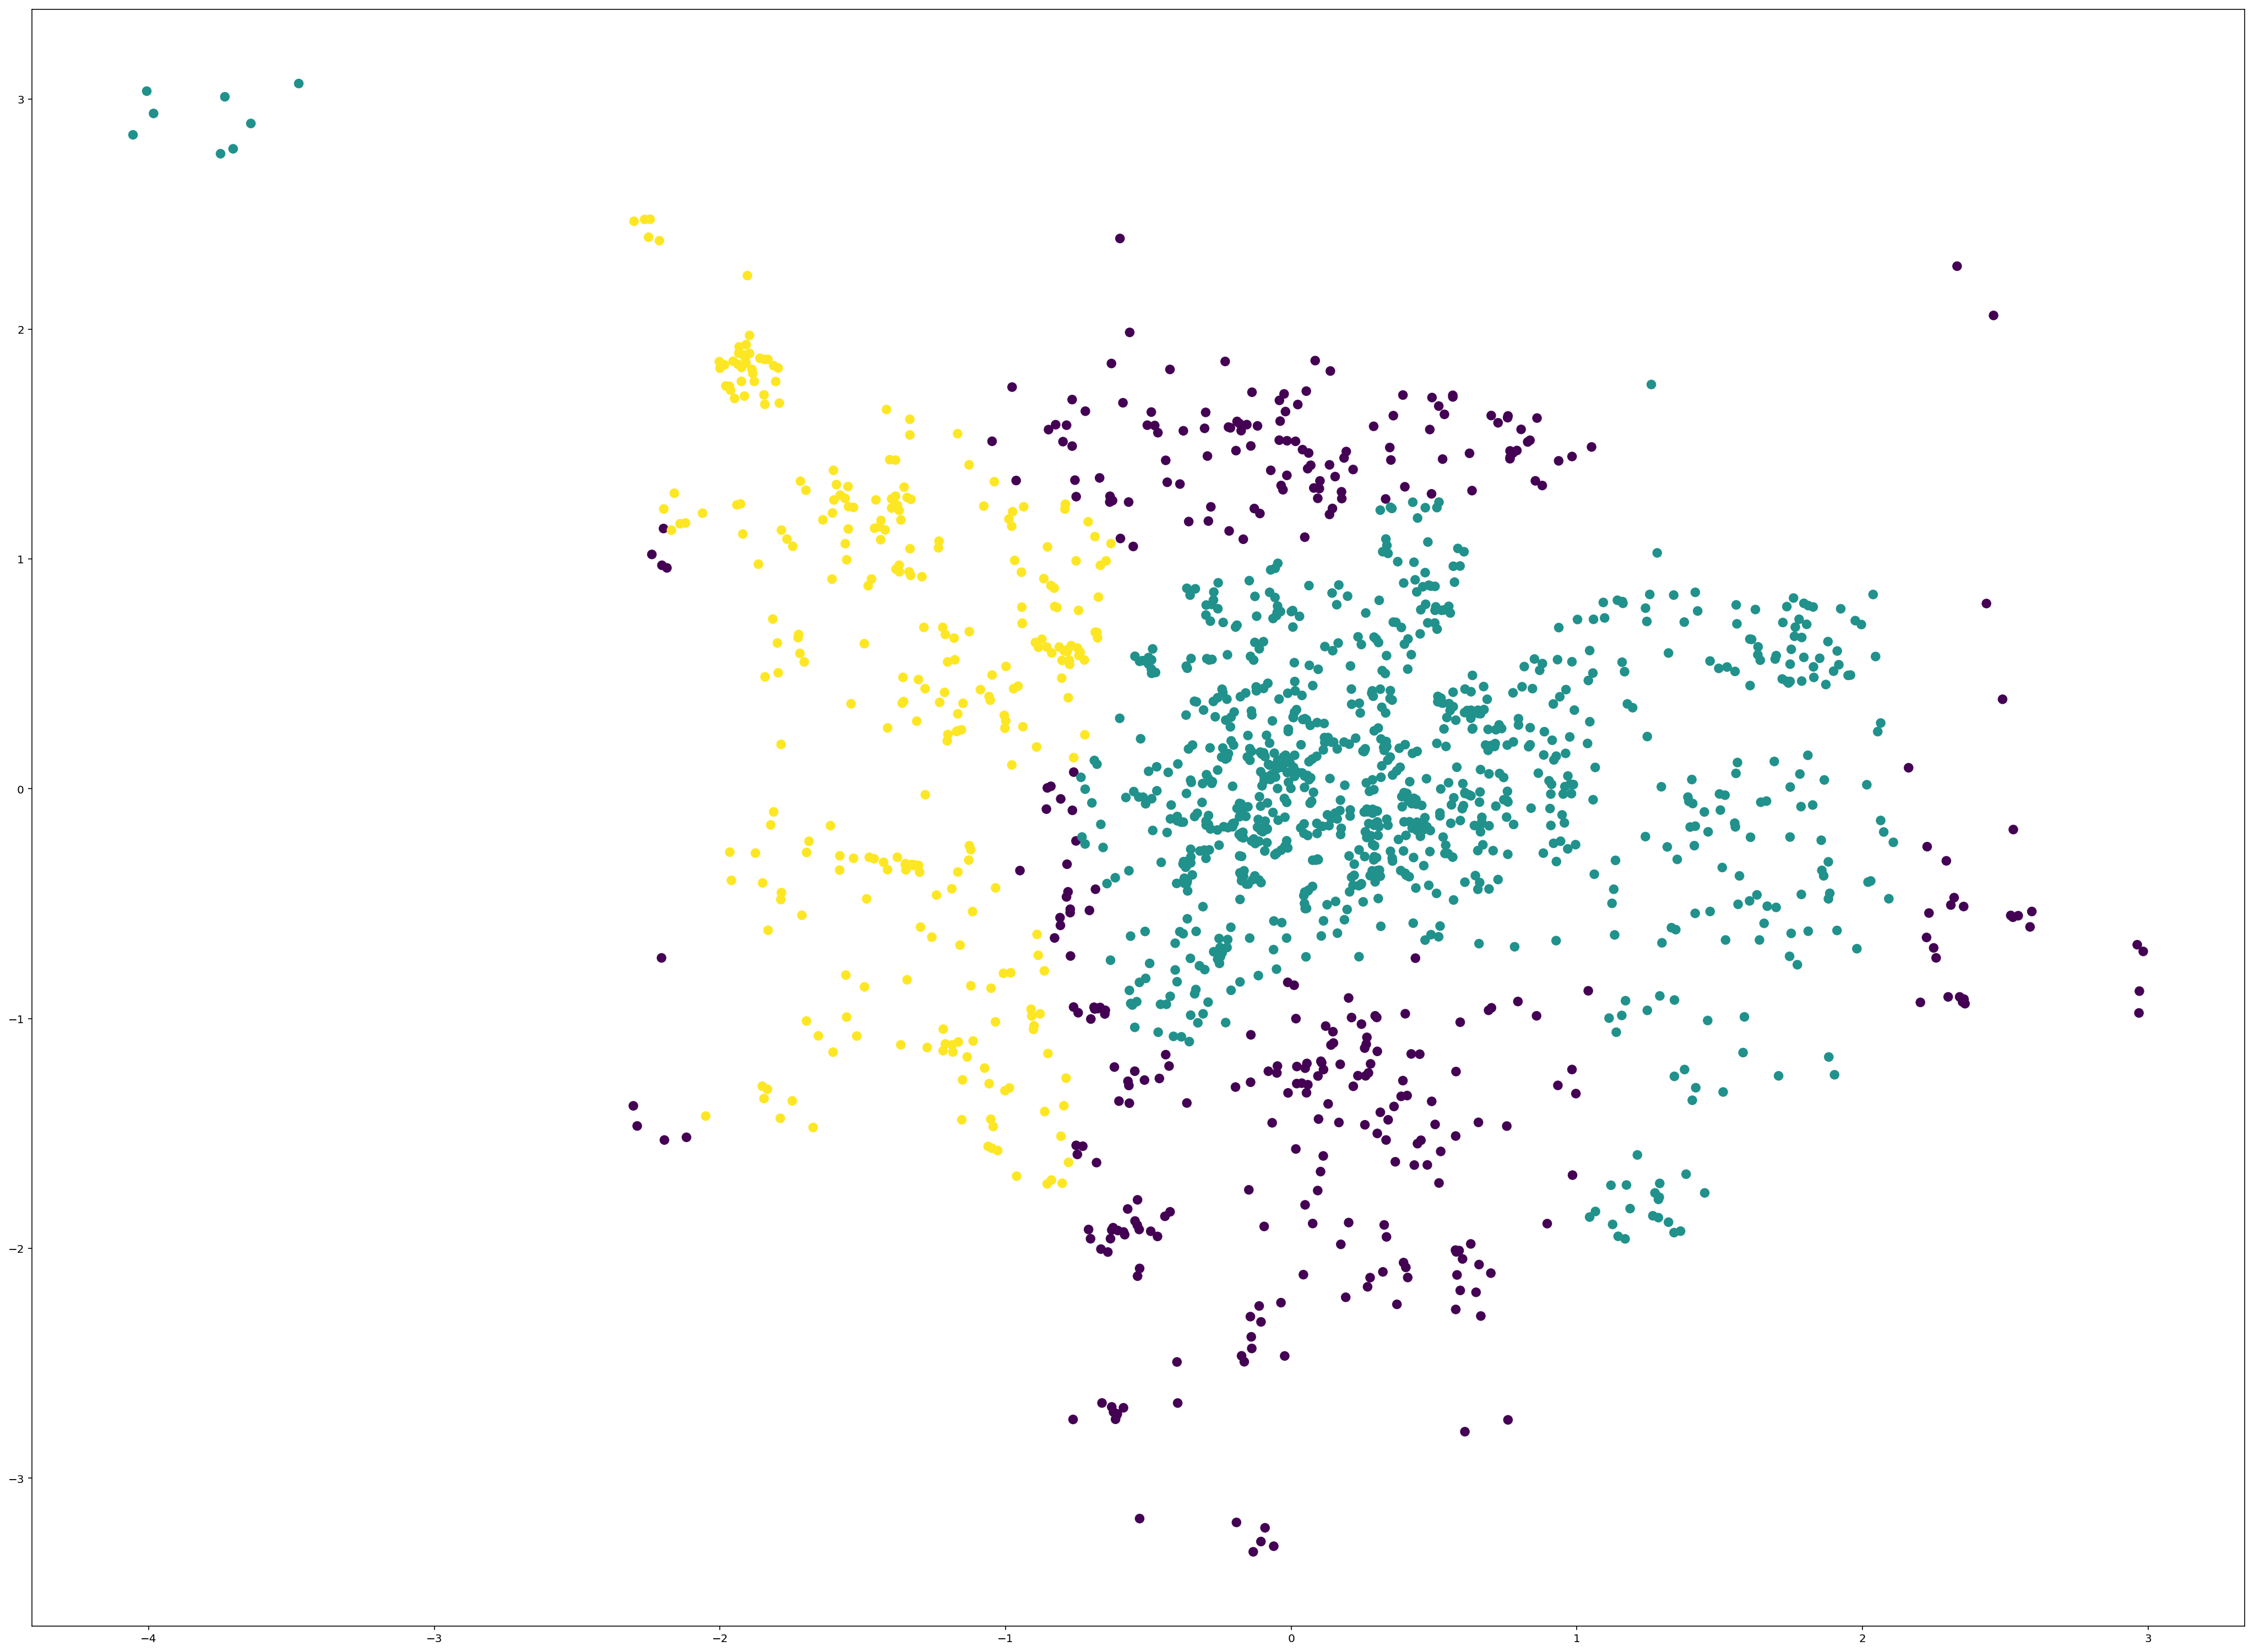

In [110]:
clusters_dbscan_protiv = DBSCAN(eps=0.25, min_samples=40, metric = 'haversine', leaf_size=30).fit_predict(Scaled_data_protiv)
plt.scatter(Scaled_data_protiv[: , 0], Scaled_data_protiv[: , 1], c=clusters_dbscan_protiv, s=60)